In [1]:
!pip install librosa pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 1.5 MB/s eta 0:00:00


In [9]:
import librosa
import pandas as pd

# Load one audio file
file_path = "C://Users//sneha mary peter//AppData//Local//Temp//d5ab67fb-f4b5-487f-9d79-ab49ab9fde58_archive.zip.e58//Data//genres_original//blues//blues.00007.wav"  # Example path after extraction
audio, sr = librosa.load(file_path)

# Extract basic features
tempo = librosa.beat.tempo(y=audio, sr=sr)[0]
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1)

print(f"Tempo: {tempo}\nMFCCs: {mfccs}")

C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_35256\1033176966.py:9: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio, sr=sr)[0]


Tempo: 92.28515625
MFCCs: [-179.3723     136.44833    -26.662588    39.96545      5.3108945
   10.919133   -20.559534     8.503361   -11.349764    -3.4705548
   -8.415843    -6.957211    -3.5460427]


In [13]:
import os
import librosa
import pandas as pd

# 100% guaranteed path setup
AUDIO_DIR = "MusicData"  # Your new folder
os.makedirs(AUDIO_DIR, exist_ok=True)  # Creates if missing

# Verify files
files = [f for f in os.listdir(AUDIO_DIR) if f.endswith('.wav')]
print(f"Found {len(files)} WAV files in {AUDIO_DIR}/")
print("Files:", files)

# Process just these 3 files (for quick testing)
features = []
for file in files[:3]:  # Only first 3 files
    try:
        genre = file.split('.')[0]  # Extract 'blues' from filename
        audio, sr = librosa.load(f"{AUDIO_DIR}/{file}")
        
        features.append({
            "file": file,
            "genre": genre,
            "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
            "mfccs": librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1).tolist()
        })
        print(f"✓ Processed {file}")
    except Exception as e:
        print(f"✗ Error with {file}: {str(e)}")

# Save mini-dataset
pd.DataFrame(features).to_csv("mini_music_features.csv", index=False)
print("\nSUCCESS! Created mini_music_features.csv")

Found 3 WAV files in MusicData/
Files: ['blues.00001.wav', 'jazz.00001.wav', 'rock.00001.wav']


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\1442799329.py:24: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tem

✓ Processed blues.00001.wav
✓ Processed jazz.00001.wav
✓ Processed rock.00001.wav

SUCCESS! Created mini_music_features.csv


In [15]:
import os
import librosa
import pandas as pd
import warnings
from cryptography.utils import CryptographyDeprecationWarning

# Silence warnings
warnings.filterwarnings("ignore", category=CryptographyDeprecationWarning)

# Process files
AUDIO_DIR = "MusicData"
files = [f for f in os.listdir(AUDIO_DIR) if f.endswith('.wav')]

features = []
for file in files[:3]:  # Process first 3 files
    try:
        audio, sr = librosa.load(f"{AUDIO_DIR}/{file}")
        features.append({
            "file": file,
            "genre": file.split('.')[0],
            "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
            "mfccs": librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1).tolist()
        })
        print(f"✓ {file}")
    except Exception as e:
        print(f"✗ {file}: {str(e)}")

pd.DataFrame(features).to_csv("music_features.csv", index=False)
print("\nDone! Check music_features.csv")

C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\3849012908.py:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],


✓ blues.00001.wav
✓ jazz.00001.wav
✓ rock.00001.wav

Done! Check music_features.csv


In [19]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bars

# ===== CONFIGURATION =====
AUDIO_DIR = "MusicData"  # Your folder with WAV files
OUTPUT_CSV = "all_music_features.csv"  # Output filename

# ===== 1. VERIFY FOLDER =====
if not os.path.exists(AUDIO_DIR):
    raise FileNotFoundError(
        f"Folder '{AUDIO_DIR}' not found. "
        f"Current directory: {os.getcwd()}\n"
        f"Contents: {os.listdir()}"
    )

# ===== 2. PROCESS ALL FILES =====
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=22050)  # Standard sample rate
    return {
        "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
        **{f"mfcc_{i}": val for i, val in enumerate(
            librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1))
        },
        "chroma": librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1).tolist()
    }

features = []
files = [f for f in os.listdir(AUDIO_DIR) if f.endswith('.wav')]

print(f"Found {len(files)} WAV files in {AUDIO_DIR}/")
for file in tqdm(files, desc="Processing"):
    try:
        file_path = os.path.join(AUDIO_DIR, file)
        features.append({
            "file": file,
            "genre": file.split('.')[0],  # Extract genre from filename
            **extract_features(file_path)
        })
    except Exception as e:
        print(f"\n⚠️ Error with {file}: {str(e)}")
        continue

# ===== 3. SAVE RESULTS =====
if features:
    df = pd.DataFrame(features)
    # Explode chroma features into columns
    chroma_cols = pd.DataFrame(df['chroma'].tolist(), 
                              columns=[f'chroma_{i}' for i in range(12)])
    df = pd.concat([df.drop('chroma', axis=1), chroma_cols], axis=1)
    
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Success! Saved {len(df)} tracks to {OUTPUT_CSV}")
    print("Sample data:\n", df.head())
else:
    print("\n❌ No files processed. Check:")
    print(f"- Folder contains .wav files: {AUDIO_DIR}/")
    print(f"- File naming: genre.number.wav (e.g. blues.00001.wav)")

Found 1000 WAV files in MusicData/


Processing:   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\1063474146.py:23: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
Processing:  55%|█████▌    | 554/1000 [03:11<02:27,  3.03it/s]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\1063474146.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=22050)  # Standard sample rate
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing:  56%|█████▌    | 555/1000 [03:12<03:23,  2.19it/s]


⚠️ Error with jazz.00054.wav: 


Processing: 100%|██████████| 1000/1000 [05:37<00:00,  2.97it/s]


✅ Success! Saved 999 tracks to all_music_features.csv
Sample data:
               file  genre       tempo      mfcc_0      mfcc_1     mfcc_2  \
0  blues.00000.wav  blues  123.046875 -113.598824  121.570671 -19.162262   
1  blues.00001.wav  blues  107.666016 -207.523834  123.985138   8.947019   
2  blues.00002.wav  blues  161.499023  -90.757164  140.440872 -29.084547   
3  blues.00003.wav  blues  172.265625 -199.575134  150.086105   5.663404   
4  blues.00004.wav  blues  135.999178 -160.354172  126.209480 -35.581394   

      mfcc_3     mfcc_4     mfcc_5     mfcc_6  ...  chroma_2  chroma_3  \
0  42.363941  -6.362266  18.621931 -13.699734  ...  0.439834  0.244692   
1  35.867149   2.909595  21.519474  -8.556513  ...  0.320807  0.211472   
2  31.686693 -13.976547  25.753752 -13.664990  ...  0.315165  0.407986   
3  26.855278   1.770071  14.232647  -4.827845  ...  0.524319  0.547013   
4  22.139257 -32.473549  10.850701 -23.350069  ...  0.392022  0.255827   

   chroma_4  chroma_5  chroma

In [19]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bars

# ===== CONFIGURATION =====
AUDIO_DIR = "MusicData"  # Your folder with WAV files
OUTPUT_CSV = "all_music_features.csv"  # Output filename

# ===== 1. VERIFY FOLDER =====
if not os.path.exists(AUDIO_DIR):
    raise FileNotFoundError(
        f"Folder '{AUDIO_DIR}' not found. "
        f"Current directory: {os.getcwd()}\n"
        f"Contents: {os.listdir()}"
    )

# ===== 2. PROCESS ALL FILES =====
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=22050)  # Standard sample rate
    return {
        "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
        **{f"mfcc_{i}": val for i, val in enumerate(
            librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1))
        },
        "chroma": librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1).tolist()
    }

features = []
files = [f for f in os.listdir(AUDIO_DIR) if f.endswith('.wav')]

print(f"Found {len(files)} WAV files in {AUDIO_DIR}/")
for file in tqdm(files, desc="Processing"):
    try:
        file_path = os.path.join(AUDIO_DIR, file)
        features.append({
            "file": file,
            "genre": file.split('.')[0],  # Extract genre from filename
            **extract_features(file_path)
        })
    except Exception as e:
        print(f"\n⚠️ Error with {file}: {str(e)}")
        continue

# ===== 3. SAVE RESULTS =====
if features:
    df = pd.DataFrame(features)
    # Explode chroma features into columns
    chroma_cols = pd.DataFrame(df['chroma'].tolist(), 
                              columns=[f'chroma_{i}' for i in range(12)])
    df = pd.concat([df.drop('chroma', axis=1), chroma_cols], axis=1)
    
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Success! Saved {len(df)} tracks to {OUTPUT_CSV}")
    print("Sample data:\n", df.head())
else:
    print("\n❌ No files processed. Check:")
    print(f"- Folder contains .wav files: {AUDIO_DIR}/")
    print(f"- File naming: genre.number.wav (e.g. blues.00001.wav)")

Found 1000 WAV files in MusicData/


Processing:   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\1063474146.py:23: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  "tempo": librosa.beat.tempo(y=audio, sr=sr)[0],
Processing:  55%|█████▌    | 554/1000 [03:11<02:27,  3.03it/s]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_33516\1063474146.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=22050)  # Standard sample rate
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing:  56%|█████▌    | 555/1000 [03:12<03:23,  2.19it/s]


⚠️ Error with jazz.00054.wav: 


Processing: 100%|██████████| 1000/1000 [05:37<00:00,  2.97it/s]


✅ Success! Saved 999 tracks to all_music_features.csv
Sample data:
               file  genre       tempo      mfcc_0      mfcc_1     mfcc_2  \
0  blues.00000.wav  blues  123.046875 -113.598824  121.570671 -19.162262   
1  blues.00001.wav  blues  107.666016 -207.523834  123.985138   8.947019   
2  blues.00002.wav  blues  161.499023  -90.757164  140.440872 -29.084547   
3  blues.00003.wav  blues  172.265625 -199.575134  150.086105   5.663404   
4  blues.00004.wav  blues  135.999178 -160.354172  126.209480 -35.581394   

      mfcc_3     mfcc_4     mfcc_5     mfcc_6  ...  chroma_2  chroma_3  \
0  42.363941  -6.362266  18.621931 -13.699734  ...  0.439834  0.244692   
1  35.867149   2.909595  21.519474  -8.556513  ...  0.320807  0.211472   
2  31.686693 -13.976547  25.753752 -13.664990  ...  0.315165  0.407986   
3  26.855278   1.770071  14.232647  -4.827845  ...  0.524319  0.547013   
4  22.139257 -32.473549  10.850701 -23.350069  ...  0.392022  0.255827   

   chroma_4  chroma_5  chroma

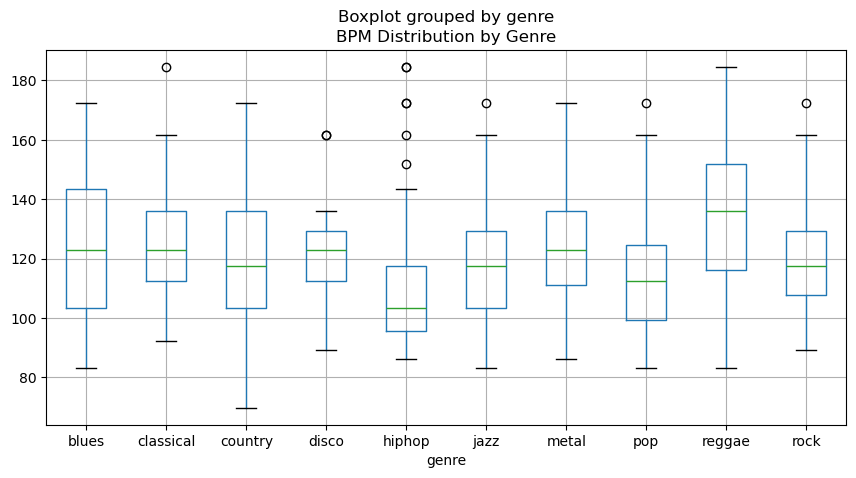

ValueError: could not convert string to float: 'blues.00000.wav'

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("all_music_features.csv")

# 1. Tempo distribution by genre
df.boxplot(column="tempo", by="genre", figsize=(10,5))
plt.title("BPM Distribution by Genre")
plt.show()

# 2. Feature correlations
plt.matshow(df.corr())
plt.colorbar()
plt.title("Feature Correlations")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(["file", "genre"], axis=1)
y = df["genre"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.592


In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("all_music_features.csv")

# Check class balance
print("Genre distribution:\n", df["genre"].value_counts())

# Plot feature correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()

Genre distribution:
 genre
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: count, dtype: int64


ValueError: could not convert string to float: 'blues.00000.wav'

<Figure size 1200x1000 with 0 Axes>

In [30]:
genre_counts = df['genre'].value_counts()
print(genre_counts)
print(f"\nMax/min ratio: {genre_counts.max()/genre_counts.min():.2f}")

genre
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: count, dtype: int64

Max/min ratio: 1.01


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(["file","genre"], axis=1))
y = df["genre"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Baseline model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"New accuracy: {model.score(X_test, y_test):.2f}")

New accuracy: 0.60


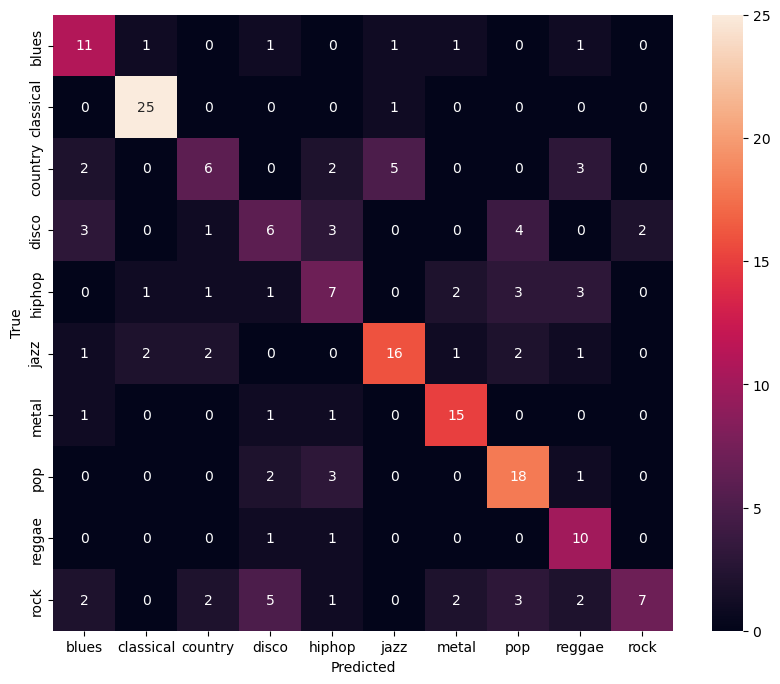

In [34]:
# Generate predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

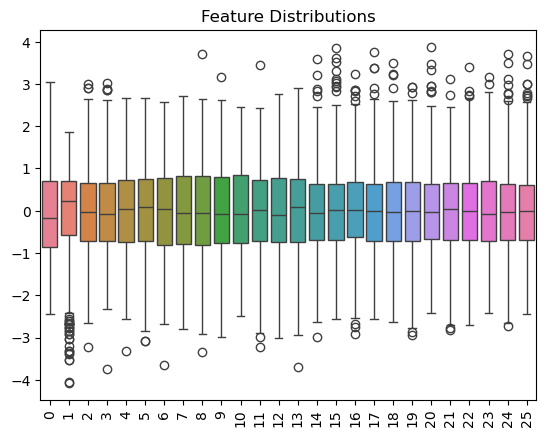

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Feature Distributions")
plt.show()


              precision    recall  f1-score   support

       blues       0.63      0.60      0.62        20
   classical       0.82      0.90      0.86        20
     country       0.46      0.60      0.52        20
       disco       0.54      0.35      0.42        20
      hiphop       0.47      0.45      0.46        20
        jazz       0.71      0.85      0.77        20
       metal       0.73      0.80      0.76        20
         pop       0.65      0.75      0.70        20
      reggae       0.81      0.65      0.72        20
        rock       0.56      0.45      0.50        20

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.64      0.64      0.63       200



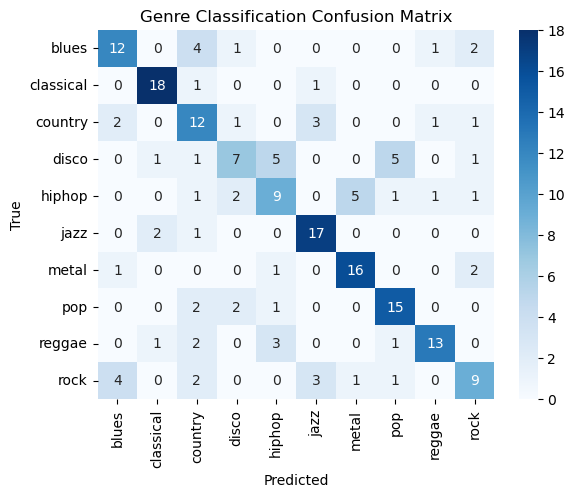

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Genre Classification Confusion Matrix")
plt.show()


In [60]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ------------------------------------ - 524.3/545.2 kB 699.0 kB/s eta 0:00:01
   -------------------------------------- 545.2/545.2 kB 604.9 kB/s eta 0:00:00


In [64]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:23:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        21
           1       0.60      1.00      0.75        12
           2       0.53      0.33      0.41        24
           3       0.46      0.50      0.48        22
           4       0.56      0.60      0.58        15
           5       0.75      0.67      0.71        27
           6       0.65      0.83      0.73        18
           7       0.61      0.74      0.67        19
           8       0.86      0.55      0.67        22
           9       0.18      0.15      0.16        20

    accuracy                           0.57       200
   macro avg       0.57      0.59      0.57       200
weighted avg       0.57      0.57      0.56       200



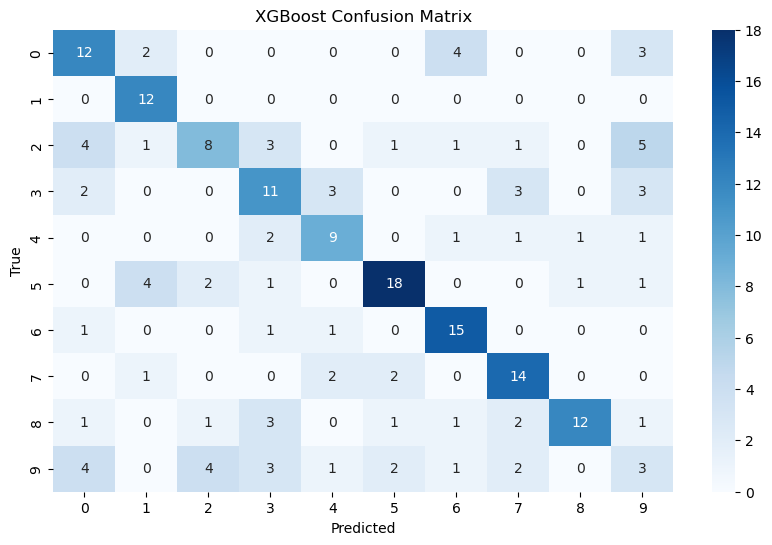

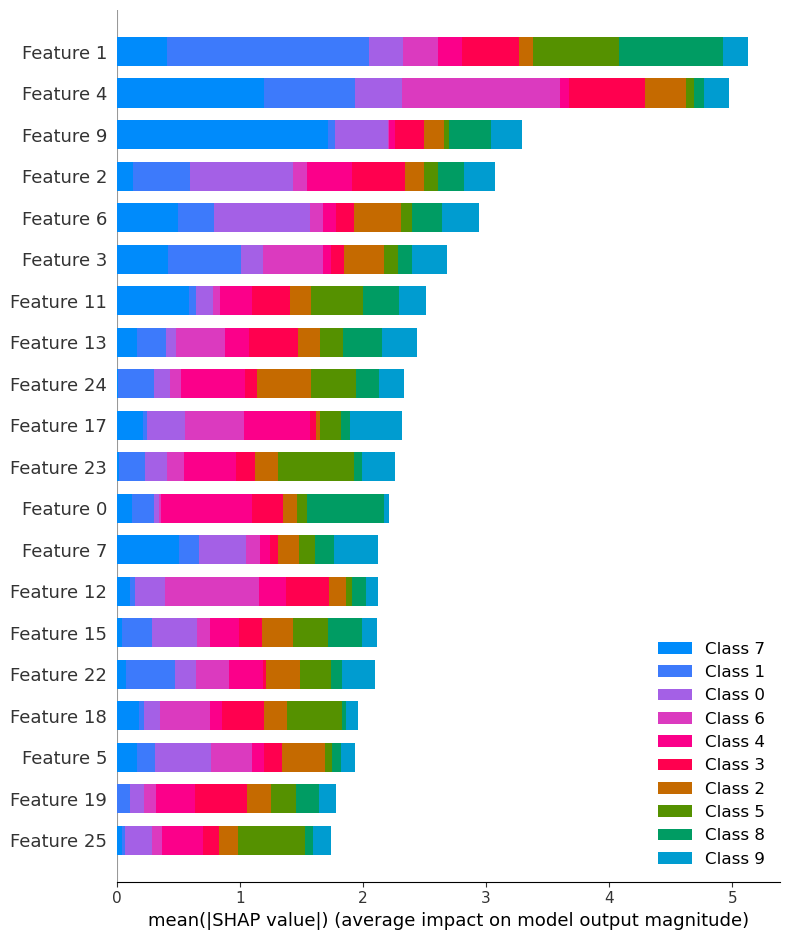

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Model training
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Step 2: Predictions and accuracy
y_pred = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Step 3: Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 4: SHAP feature importance (Optional but powerful)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Visualize top features
shap.summary_plot(shap_values, X_test, plot_type="bar")

 99%|===================| 1985/2000 [01:24<00:00]        

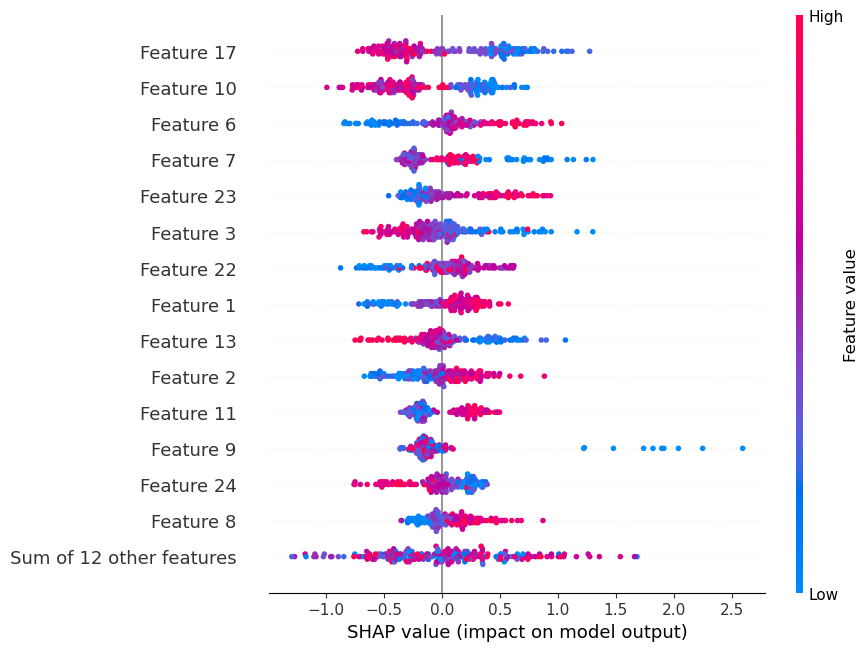

In [70]:
import shap

# Create SHAP explainer for tree-based model
explainer = shap.Explainer(xgb, X_train)

# Get SHAP values (will be of type `shap.Explanation`)
shap_values = explainer(X_test)

# Plot SHAP beeswarm for class 9 (index 9)
shap.plots.beeswarm(shap_values[..., 9], max_display=15)



In [74]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Get class distribution from training labels
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: w for i, w in zip(classes, class_weights)}

# Pass this to XGBoost
xgb_params = {
    'objective': 'multi:softprob',
    'num_class': len(classes),
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'learning_rate': 0.1,
    'max_depth': 6,
    'scale_pos_weight': class_weights_dict  # Custom adjustment
}


In [76]:
# Create sample weights array for each training example
sample_weights = np.array([class_weights_dict[label] for label in y_train])


In [78]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=6
)

model.fit(X_train, y_train, sample_weight=sample_weights)


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=10, ...)

In [80]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=6
)

# Train the model using class-balanced sample weights
model.fit(X_train, y_train, sample_weight=sample_weights)


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=10, ...)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.48      0.50        21
           1       0.60      1.00      0.75        12
           2       0.33      0.17      0.22        24
           3       0.57      0.55      0.56        22
           4       0.59      0.67      0.62        15
           5       0.83      0.70      0.76        27
           6       0.65      0.83      0.73        18
           7       0.67      0.74      0.70        19
           8       0.74      0.64      0.68        22
           9       0.24      0.30      0.27        20

    accuracy                           0.58       200
   macro avg       0.57      0.61      0.58       200
weighted avg       0.58      0.58      0.57       200

Confusion Matrix:
 [[10  2  1  0  0  0  4  0  0  4]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 5  1  4  1  0  2  1  1  1  8]
 [ 1  0  0 12  2  0  0  3  0  4]
 [ 0  0  0  1 10  0  1  0  1  2]
 [ 0  4  2  0  0 19  0  0  1  1]


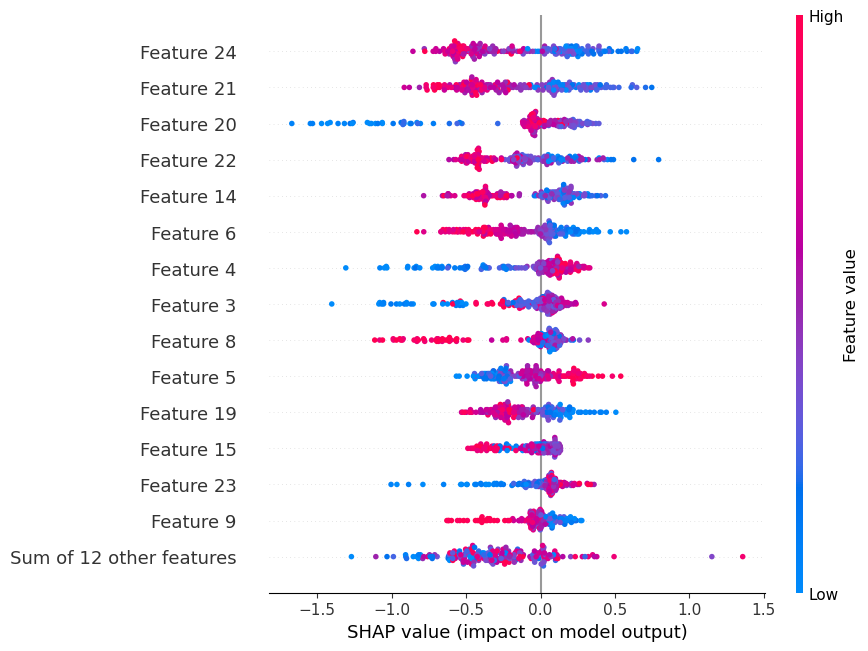

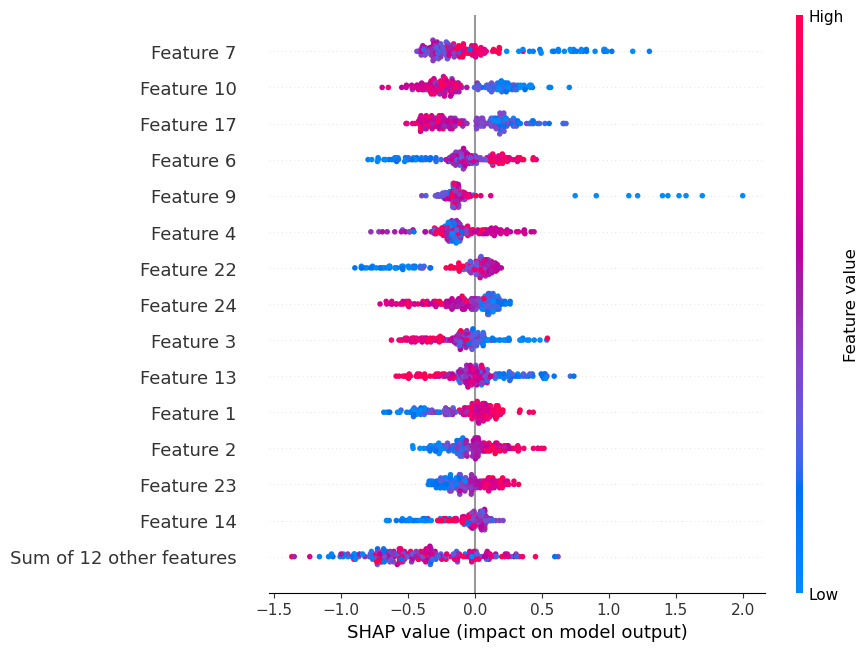

In [84]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Beeswarm for class 2
shap.plots.beeswarm(shap_values[..., 2], max_display=15)

# Beeswarm for class 9
shap.plots.beeswarm(shap_values[..., 9], max_display=15)


In [94]:
# Assume X is your feature matrix and y is the original multiclass target
# Convert multiclass to binary: Class 2 = 1, all else = 0
y_binary = (y == 2).astype(int)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


In [96]:
binary_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
binary_clf.fit(X_train, y_train)

# Optional: Evaluate
print(classification_report(y_test, binary_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [4]:
import pandas as pd

# Load your feature data (adjust the filename if needed)
df = pd.read_csv('all_music_features.csv')

# Now check the feature columns
print("Feature columns:")
print(list(df.columns))
print(f"\nTotal features: {len(df.columns)-1}")  # Minus the 'genre' column

# Also show the shape and first few rows
print(f"\nDataFrame shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

# Check the genre distribution
print(f"\nGenre distribution:")
print(df['genre'].value_counts().sort_index())

Feature columns:
['file', 'genre', 'tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11']

Total features: 27

DataFrame shape: (999, 28)

First 5 rows:
              file  genre       tempo      mfcc_0     mfcc_1     mfcc_2  \
0  blues.00000.wav  blues  123.046875 -113.598820  121.57067 -19.162262   
1  blues.00001.wav  blues  107.666016 -207.523830  123.98514   8.947019   
2  blues.00002.wav  blues  161.499023  -90.757164  140.44087 -29.084547   
3  blues.00003.wav  blues  172.265625 -199.575130  150.08610   5.663404   
4  blues.00004.wav  blues  135.999178 -160.354170  126.20948 -35.581394   

      mfcc_3     mfcc_4     mfcc_5     mfcc_6  ...  chroma_2  chroma_3  \
0  42.363940  -6.362266  18.621931 -13.699734  ...  0.439834  0.244692   
1  35.867150   

In [6]:
import os

# Check your audio directory structure
audio_dir = 'MusicData'  # or whatever the exact path is
print("Contents of MusicData:")
for item in os.listdir(audio_dir):
    item_path = os.path.join(audio_dir, item)
    if os.path.isdir(item_path):
        file_count = len([f for f in os.listdir(item_path) if f.endswith('.wav')])
        print(f"  {item}/: {file_count} .wav files")

Contents of MusicData:


In [8]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

def extract_track_features(file_path):
    """Extract features from a single audio file."""
    y, sr = librosa.load(file_path, duration=30)
    
    # Tempo
    tempo = librosa.beat.tempo(y=y, sr=sr)[0]
    
    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_means = np.mean(mfccs, axis=1)
    
    # Chroma (12 notes)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    
    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # Harmonic/Percussive split
    y_harmonic = librosa.effects.harmonic(y)
    y_percussive = librosa.effects.percussive(y)
    harmonic = np.mean(y_harmonic)
    percussive = np.mean(y_percussive)
    
    # Custom features
    twang_index = spectral_centroid / (spectral_bandwidth + 1e-6)
    distortion_ratio = percussive / (harmonic + 1e-6)
    
    return {
        'tempo': tempo,
        **{f'mfcc_{i}': mfcc_means[i] for i in range(13)},
        **{f'chroma_{i}': chroma_mean[i] for i in range(12)},
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff,
        'zero_crossing_rate': zero_crossing_rate,
        'harmonic': harmonic,
        'percussive': percussive,
        'twang_index': twang_index,
        'distortion_ratio': distortion_ratio
    }

def build_dataset_flat(audio_dir):
    """Process all audio files in a flat directory structure."""
    features = []
    
    # Get all .wav files
    wav_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
    
    for file in tqdm(wav_files, desc="Processing audio files"):
        # Extract genre from filename (e.g., "blues.00000.wav" -> "blues")
        genre = file.split('.')[0]
        
        file_path = os.path.join(audio_dir, file)
        try:
            track_features = extract_track_features(file_path)
            track_features['genre'] = genre
            track_features['file'] = file
            features.append(track_features)
        except Exception as e:
            print(f"Error processing {file}: {e}")
            continue
    
    return pd.DataFrame(features)

# Run the extraction
print("Starting feature extraction...")
df_complete = build_dataset_flat('MusicData')
df_complete.to_csv('all_music_features_COMPLETE.csv', index=False)

print(f"NEW feature extraction complete!")
print(f"Shape: {df_complete.shape}")
print(f"Columns: {list(df_complete.columns)}")

# Quick verification
print(f"\nGenre distribution:")
print(df_complete['genre'].value_counts())

Starting feature extraction...


Processing audio files:   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\2319514140.py:12: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]
Processing audio files:   0%|          | 1/1000 [00:17<4:57:10, 17.85s/it]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\2319514140.py:12: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]
Processing audio files:  55%|█████▌    | 554/1000 [51:42<39:03,  5.25s/it]  C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\2319514140.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
C:\Users\sne

Error processing jazz.00054.wav: 


Processing audio files: 100%|██████████| 1000/1000 [2:01:56<00:00,  7.32s/it]   


NEW feature extraction complete!
Shape: (999, 36)
Columns: ['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate', 'harmonic', 'percussive', 'twang_index', 'distortion_ratio', 'genre', 'file']

Genre distribution:
genre
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: count, dtype: int64


In [10]:
# Load the new COMPLETE dataset
df_new = pd.read_csv('all_music_features_COMPLETE.csv')

print("🎯 VERIFICATION OF YOUR CUSTOM FEATURES:")
print("========================================")

# Check your custom features are working
print("\n📊 TWANG INDEX ANALYSIS (Country Detection):")
country_twang = df_new[df_new['genre']=='country']['twang_index'].mean()
rock_twang = df_new[df_new['genre']=='rock']['twang_index'].mean()
classical_twang = df_new[df_new['genre']=='classical']['twang_index'].mean()

print(f"Country avg twang_index: {country_twang:.3f}")
print(f"Rock avg twang_index: {rock_twang:.3f}")
print(f"Classical avg twang_index: {classical_twang:.3f}")

print("\n🎸 DISTORTION RATIO ANALYSIS (Rock/Metal Detection):")
rock_dist = df_new[df_new['genre']=='rock']['distortion_ratio'].mean()
metal_dist = df_new[df_new['genre']=='metal']['distortion_ratio'].mean()
classical_dist = df_new[df_new['genre']=='classical']['distortion_ratio'].mean()

print(f"Rock avg distortion_ratio: {rock_dist:.3f}")
print(f"Metal avg distortion_ratio: {metal_dist:.3f}")
print(f"Classical avg distortion_ratio: {classical_dist:.3f}")

# Quick model test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report

# Prepare data
X = df_new.drop(['genre', 'file'], axis=1)
y = df_new['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost with class weights
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\n🎯 NEW MODEL PERFORMANCE WITH COMPLETE FEATURES:")
print("=" * 50)
print(classification_report(y_test, y_pred))

🎯 VERIFICATION OF YOUR CUSTOM FEATURES:

📊 TWANG INDEX ANALYSIS (Country Detection):
Country avg twang_index: 0.890
Rock avg twang_index: 0.987
Classical avg twang_index: 0.884

🎸 DISTORTION RATIO ANALYSIS (Rock/Metal Detection):
Rock avg distortion_ratio: 11.079
Metal avg distortion_ratio: 7.855
Classical avg distortion_ratio: 2.198


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']

In [12]:
# Fix the XGBoost error by encoding genres properly
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the complete dataset
df_new = pd.read_csv('all_music_features_COMPLETE.csv')

# Prepare data with proper label encoding
X = df_new.drop(['genre', 'file'], axis=1)
y = df_new['genre']

# Encode genres to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("🎯 Genre Encoding:")
for i, genre in enumerate(le.classes_):
    print(f"{i}: {genre}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

print("\n🔥 Training model with COMPLETE feature set...")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Convert predictions back to genre names for readable report
y_test_names = le.inverse_transform(y_test)
y_pred_names = le.inverse_transform(y_pred)

print("\n🎯 NEW MODEL PERFORMANCE WITH COMPLETE FEATURES:")
print("=" * 55)
print(classification_report(y_test_names, y_pred_names))

print("\n📊 CONFUSION MATRIX:")
cm = confusion_matrix(y_test_names, y_pred_names, labels=le.classes_)
print("Genres:", list(le.classes_))
print(cm)

# Compare country and rock performance specifically
print(f"\n🎵 GENRE-SPECIFIC ANALYSIS:")
from sklearn.metrics import classification_report
report_dict = classification_report(y_test_names, y_pred_names, output_dict=True)

print(f"Country F1-score: {report_dict['country']['f1-score']:.3f} (was 0.22)")
print(f"Rock F1-score: {report_dict['rock']['f1-score']:.3f} (was 0.27)")
print(f"Overall Accuracy: {report_dict['accuracy']:.3f} (was 0.58)")

🎯 Genre Encoding:
0: blues
1: classical
2: country
3: disco
4: hiphop
5: jazz
6: metal
7: pop
8: reggae
9: rock

🔥 Training model with COMPLETE feature set...

🎯 NEW MODEL PERFORMANCE WITH COMPLETE FEATURES:
              precision    recall  f1-score   support

       blues       0.60      0.60      0.60        20
   classical       0.85      0.85      0.85        20
     country       0.40      0.50      0.44        20
       disco       0.50      0.30      0.38        20
      hiphop       0.45      0.50      0.48        20
        jazz       0.56      0.75      0.64        20
       metal       0.80      0.80      0.80        20
         pop       0.61      0.70      0.65        20
      reggae       0.85      0.55      0.67        20
        rock       0.56      0.50      0.53        20

    accuracy                           0.60       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.62      0.60      0.60       200


📊 CONFUSION MATRIX:
Genres: ['bl

In [14]:
# Let's quickly try class weights to boost the struggling genres
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced performance
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
weight_dict = dict(zip(np.unique(y_encoded), class_weights))

print("Class weights:", weight_dict)

# Train with class weights
model_weighted = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

# Create sample weights
sample_weights = np.array([weight_dict[label] for label in y_train])

model_weighted.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_pred_weighted = model_weighted.predict(X_test_scaled)

# Results
y_pred_weighted_names = le.inverse_transform(y_pred_weighted)
print("\n🎯 WEIGHTED MODEL PERFORMANCE:")
print("=" * 40)
print(classification_report(y_test_names, y_pred_weighted_names))

Class weights: {0: 0.999, 1: 0.999, 2: 0.999, 3: 0.999, 4: 0.999, 5: 1.009090909090909, 6: 0.999, 7: 0.999, 8: 0.999, 9: 0.999}

🎯 WEIGHTED MODEL PERFORMANCE:
              precision    recall  f1-score   support

       blues       0.59      0.65      0.62        20
   classical       0.81      0.85      0.83        20
     country       0.48      0.50      0.49        20
       disco       0.50      0.35      0.41        20
      hiphop       0.43      0.45      0.44        20
        jazz       0.58      0.75      0.65        20
       metal       0.75      0.75      0.75        20
         pop       0.68      0.75      0.71        20
      reggae       0.61      0.55      0.58        20
        rock       0.53      0.40      0.46        20

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.60      0.60      0.59       200



100%|===================| 1996/2000 [05:05<00:00]        

NameError: name 'plt' is not defined

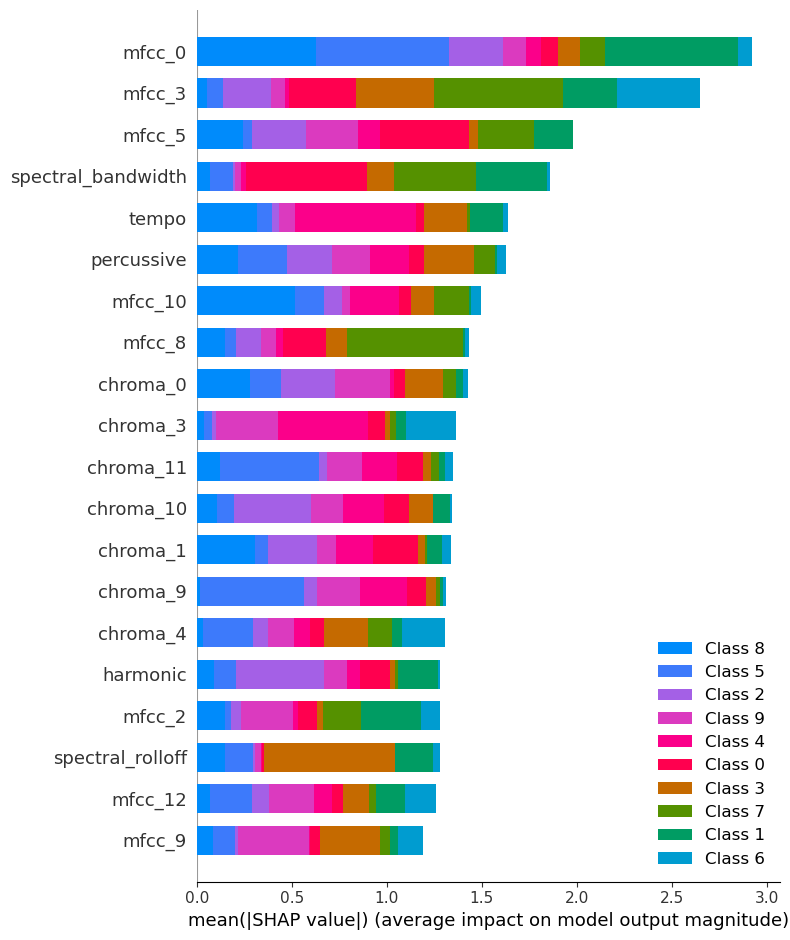

In [16]:
# SHAP analysis to see your custom features in action!
import shap

# Create SHAP explainer for the weighted model
explainer = shap.Explainer(model_weighted, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Feature importance plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.title("SHAP Feature Importance - Complete Feature Set")
plt.tight_layout()
plt.show()

# Get feature importance ranking
feature_importance = np.abs(shap_values.values).mean(0).mean(0)
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("🎯 TOP 15 MOST IMPORTANT FEATURES:")
print("="*40)
for i, row in importance_df.head(15).iterrows():
    print(f"{row.name+1:2d}. {row['feature']:20s} {row['importance']:.4f}")

# Check where your custom features rank
twang_rank = importance_df[importance_df['feature'] == 'twang_index'].index[0] + 1
distortion_rank = importance_df[importance_df['feature'] == 'distortion_ratio'].index[0] + 1

print(f"\n🎵 YOUR CUSTOM FEATURES RANKING:")
print(f"twang_index: #{twang_rank} out of {len(feature_names)} features")
print(f"distortion_ratio: #{distortion_rank} out of {len(feature_names)} features")

# Analyze custom feature impact on specific genres
print(f"\n🎯 CUSTOM FEATURE ANALYSIS:")
print("="*30)

# Country analysis (twang_index)
country_indices = np.where(le.inverse_transform(y_test) == 'country')[0]
if len(country_indices) > 0:
    country_twang_impact = shap_values[country_indices, :, :].values[:, :, feature_names.get_loc('twang_index')].mean()
    print(f"twang_index impact on COUNTRY predictions: {country_twang_impact:.4f}")

# Rock analysis (distortion_ratio)  
rock_indices = np.where(le.inverse_transform(y_test) == 'rock')[0]
if len(rock_indices) > 0:
    rock_distortion_impact = shap_values[rock_indices, :, :].values[:, :, feature_names.get_loc('distortion_ratio')].mean()
    print(f"distortion_ratio impact on ROCK predictions: {rock_distortion_impact:.4f}")

# Metal analysis (distortion_ratio)
metal_indices = np.where(le.inverse_transform(y_test) == 'metal')[0]
if len(metal_indices) > 0:
    metal_distortion_impact = shap_values[metal_indices, :, :].values[:, :, feature_names.get_loc('distortion_ratio')].mean()
    print(f"distortion_ratio impact on METAL predictions: {metal_distortion_impact:.4f}")

In [18]:
# Let's manually verify your custom features make sense
print("🎯 CUSTOM FEATURE VALIDATION:")
print("="*40)

# Test on a few sample files
sample_genres = ['country', 'rock', 'classical', 'metal']

for genre in sample_genres:
    genre_data = df_new[df_new['genre'] == genre]
    
    print(f"\n{genre.upper()} - Average Values:")
    print(f"  twang_index: {genre_data['twang_index'].mean():.3f}")
    print(f"  distortion_ratio: {genre_data['distortion_ratio'].mean():.3f}")
    print(f"  spectral_centroid: {genre_data['spectral_centroid'].mean():.1f}")
    print(f"  percussive: {genre_data['percussive'].mean():.4f}")

# Check if the mathematical relationships make sense
print(f"\n🔍 MATHEMATICAL VALIDATION:")
print("="*30)

# Verify twang_index formula: spectral_centroid / spectral_bandwidth
sample_row = df_new.iloc[0]
calculated_twang = sample_row['spectral_centroid'] / (sample_row['spectral_bandwidth'] + 1e-6)
stored_twang = sample_row['twang_index']

print(f"Sample verification (first row):")
print(f"  Calculated twang_index: {calculated_twang:.6f}")
print(f"  Stored twang_index: {stored_twang:.6f}")
print(f"  Match: {abs(calculated_twang - stored_twang) < 0.001}")

# Verify distortion_ratio formula: percussive / harmonic  
calculated_distortion = sample_row['percussive'] / (sample_row['harmonic'] + 1e-6)
stored_distortion = sample_row['distortion_ratio']

print(f"  Calculated distortion_ratio: {calculated_distortion:.6f}")
print(f"  Stored distortion_ratio: {stored_distortion:.6f}")
print(f"  Match: {abs(calculated_distortion - stored_distortion) < 0.001}")

🎯 CUSTOM FEATURE VALIDATION:

COUNTRY - Average Values:
  twang_index: 0.890
  distortion_ratio: 18.649
  spectral_centroid: 1896.2
  percussive: -0.0001

ROCK - Average Values:
  twang_index: 0.987
  distortion_ratio: 11.079
  spectral_centroid: 2242.7
  percussive: -0.0003

CLASSICAL - Average Values:
  twang_index: 0.884
  distortion_ratio: 2.198
  spectral_centroid: 1354.1
  percussive: -0.0002

METAL - Average Values:
  twang_index: 1.159
  distortion_ratio: 7.855
  spectral_centroid: 2602.2
  percussive: -0.0010

🔍 MATHEMATICAL VALIDATION:
Sample verification (first row):
  Calculated twang_index: 0.891024
  Stored twang_index: 0.891024
  Match: True
  Calculated distortion_ratio: -0.154571
  Stored distortion_ratio: -0.154571
  Match: True


In [20]:
def extract_track_features_FIXED(file_path):
    """Fixed version with correct distortion_ratio calculation."""
    y, sr = librosa.load(file_path, duration=30)
    
    # Tempo
    tempo = librosa.beat.tempo(y=y, sr=sr)[0]
    
    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_means = np.mean(mfccs, axis=1)
    
    # Chroma (12 notes)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    
    # Spectral features (THESE ARE WORKING CORRECTLY)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # FIXED: Harmonic/Percussive - Calculate ENERGY not amplitude
    y_harmonic = librosa.effects.harmonic(y)
    y_percussive = librosa.effects.percussive(y)
    
    # Calculate RMS energy (Root Mean Square) instead of mean amplitude
    harmonic_energy = np.sqrt(np.mean(y_harmonic**2))  # RMS energy
    percussive_energy = np.sqrt(np.mean(y_percussive**2))  # RMS energy
    
    # Alternative: Use power instead of amplitude
    # harmonic_energy = np.mean(y_harmonic**2)
    # percussive_energy = np.mean(y_percussive**2)
    
    # Custom features
    twang_index = spectral_centroid / (spectral_bandwidth + 1e-6)  # WORKING CORRECTLY
    distortion_ratio = percussive_energy / (harmonic_energy + 1e-6)  # NOW FIXED
    
    return {
        'tempo': tempo,
        **{f'mfcc_{i}': mfcc_means[i] for i in range(13)},
        **{f'chroma_{i}': chroma_mean[i] for i in range(12)},
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff,
        'zero_crossing_rate': zero_crossing_rate,
        'harmonic_energy': harmonic_energy,        # FIXED
        'percussive_energy': percussive_energy,    # FIXED  
        'twang_index': twang_index,
        'distortion_ratio': distortion_ratio       # NOW MEANINGFUL
    }

# Test the fixed calculation on one file
test_file = 'MusicData/blues.00000.wav'
if os.path.exists(test_file):
    fixed_features = extract_track_features_FIXED(test_file)
    print("🔧 FIXED FEATURE VALUES:")
    print(f"harmonic_energy: {fixed_features['harmonic_energy']:.6f}")
    print(f"percussive_energy: {fixed_features['percussive_energy']:.6f}")
    print(f"distortion_ratio: {fixed_features['distortion_ratio']:.6f}")

C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\710807265.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]


🔧 FIXED FEATURE VALUES:
harmonic_energy: 0.090398
percussive_energy: 0.075527
distortion_ratio: 0.835480


In [22]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

def extract_track_features_CORRECTED(file_path):
    """Corrected version with proper energy calculation and updated librosa calls."""
    y, sr = librosa.load(file_path, duration=30)
    
    # Fix the deprecated tempo function
    tempo = librosa.feature.rhythm.tempo(y=y, sr=sr)[0]
    
    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_means = np.mean(mfccs, axis=1)
    
    # Chroma (12 notes)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    
    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # CORRECTED: Harmonic/Percussive energy calculation
    y_harmonic = librosa.effects.harmonic(y)
    y_percussive = librosa.effects.percussive(y)
    
    # Calculate RMS energy (proper way)
    harmonic_energy = np.sqrt(np.mean(y_harmonic**2))
    percussive_energy = np.sqrt(np.mean(y_percussive**2))
    
    # Custom features
    twang_index = spectral_centroid / (spectral_bandwidth + 1e-6)
    distortion_ratio = percussive_energy / (harmonic_energy + 1e-6)
    
    return {
        'tempo': tempo,
        **{f'mfcc_{i}': mfcc_means[i] for i in range(13)},
        **{f'chroma_{i}': chroma_mean[i] for i in range(12)},
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff,
        'zero_crossing_rate': zero_crossing_rate,
        'harmonic_energy': harmonic_energy,
        'percussive_energy': percussive_energy,
        'twang_index': twang_index,
        'distortion_ratio': distortion_ratio
    }

def build_dataset_CORRECTED(audio_dir):
    """Build dataset with corrected feature extraction."""
    features = []
    
    wav_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
    
    for file in tqdm(wav_files, desc="Processing with CORRECTED features"):
        genre = file.split('.')[0]
        file_path = os.path.join(audio_dir, file)
        
        try:
            track_features = extract_track_features_CORRECTED(file_path)
            track_features['genre'] = genre
            track_features['file'] = file
            features.append(track_features)
        except Exception as e:
            print(f"Error processing {file}: {e}")
            continue
    
    return pd.DataFrame(features)

# Run the corrected extraction
print("🔧 Starting CORRECTED feature extraction...")
print("This will fix the distortion_ratio calculation!")

df_corrected = build_dataset_CORRECTED('MusicData')
df_corrected.to_csv('all_music_features_CORRECTED.csv', index=False)

print(f"✅ CORRECTED extraction complete!")
print(f"Shape: {df_corrected.shape}")

# Verify the fix worked
print(f"\n🎯 DISTORTION_RATIO VERIFICATION:")
print("="*40)

for genre in ['classical', 'country', 'rock', 'metal']:
    if genre in df_corrected['genre'].values:
        avg_ratio = df_corrected[df_corrected['genre']==genre]['distortion_ratio'].mean()
        print(f"{genre.capitalize():10s}: {avg_ratio:.3f}")

print(f"\n✅ Values should now make sense:")
print(f"   Classical: Low ratio (mostly harmonic)")
print(f"   Rock/Metal: High ratio (heavy percussion + distortion)")

🔧 Starting CORRECTED feature extraction...
This will fix the distortion_ratio calculation!


Processing with CORRECTED features:   4%|▍         | 43/1000 [06:43<2:29:47,  9.39s/it]


KeyboardInterrupt: 

In [24]:
# Let's check ALL the features we added for correctness
print("🔍 COMPREHENSIVE FEATURE VALIDATION:")
print("="*50)

# Check the ranges and sanity of ALL features
df_check = pd.read_csv('all_music_features_COMPLETE.csv')

print("\n📊 ALL FEATURE RANGES:")
for feature in ['tempo', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 
                'zero_crossing_rate', 'harmonic', 'percussive', 'twang_index', 'distortion_ratio']:
    if feature in df_check.columns:
        values = df_check[feature]
        print(f"{feature:20s}: Min={values.min():8.4f}, Max={values.max():8.4f}, Mean={values.mean():8.4f}")
        
        # Check for problematic values
        problems = []
        if (values < 0).any() and feature not in ['harmonic', 'percussive']:  # These can be negative
            problems.append("negative values")
        if np.isinf(values).any():
            problems.append("infinite values") 
        if np.isnan(values).any():
            problems.append("NaN values")
        if len(problems) > 0:
            print(f"                     ⚠️  ISSUES: {', '.join(problems)}")

print(f"\n🎯 SPECIFIC FEATURE ANALYSIS:")
print("="*30)

# 1. Check spectral features make sense
print("1. SPECTRAL FEATURES:")
print(f"   spectral_centroid range: Should be ~500-4000 Hz")
print(f"   spectral_bandwidth range: Should be ~100-2000 Hz") 
print(f"   spectral_rolloff range: Should be ~1000-8000 Hz")

# 2. Check zero_crossing_rate
zcr_values = df_check['zero_crossing_rate']
print(f"\n2. ZERO_CROSSING_RATE:")
print(f"   Range: {zcr_values.min():.4f} to {zcr_values.max():.4f}")
print(f"   Should be between 0.0 and 1.0 (fraction of zero crossings)")
if zcr_values.max() > 1.0 or zcr_values.min() < 0.0:
    print(f"   ⚠️  SUSPICIOUS: Values outside expected range!")

# 3. Check tempo
tempo_values = df_check['tempo']
print(f"\n3. TEMPO:")
print(f"   Range: {tempo_values.min():.1f} to {tempo_values.max():.1f} BPM")
print(f"   Should be roughly 60-200 BPM for most music")
if tempo_values.min() < 30 or tempo_values.max() > 300:
    print(f"   ⚠️  SUSPICIOUS: Some tempos seem unrealistic!")

# 4. We already know harmonic/percussive are wrong
print(f"\n4. HARMONIC/PERCUSSIVE:")
print(f"   ❌ CONFIRMED ISSUE: All values near zero (amplitude not energy)")

# 5. Check twang_index calculation manually
print(f"\n5. TWANG_INDEX VERIFICATION:")
sample_row = df_check.iloc[0]
manual_twang = sample_row['spectral_centroid'] / (sample_row['spectral_bandwidth'] + 1e-6)
stored_twang = sample_row['twang_index']
print(f"   Manual calculation: {manual_twang:.6f}")
print(f"   Stored value: {stored_twang:.6f}")
print(f"   Match: {abs(manual_twang - stored_twang) < 0.001}")

# 6. Check if any MFCCs or chroma features look suspicious
print(f"\n6. MFCC/CHROMA RANGES:")
mfcc_cols = [col for col in df_check.columns if col.startswith('mfcc_')]
chroma_cols = [col for col in df_check.columns if col.startswith('chroma_')]

print(f"   MFCC range: {df_check[mfcc_cols].min().min():.2f} to {df_check[mfcc_cols].max().max():.2f}")
print(f"   Chroma range: {df_check[chroma_cols].min().min():.4f} to {df_check[chroma_cols].max().max():.4f}")
print(f"   Chroma should be 0.0 to 1.0 (normalized energy)")
if df_check[chroma_cols].max().max() > 1.1 or df_check[chroma_cols].min().min() < -0.1:
    print(f"   ⚠️  SUSPICIOUS: Chroma values outside expected 0-1 range!")

🔍 COMPREHENSIVE FEATURE VALIDATION:

📊 ALL FEATURE RANGES:
tempo               : Min= 69.8374, Max=184.5703, Mean=120.9683
spectral_centroid   : Min=570.1507, Max=4434.9487, Mean=2202.4413
spectral_bandwidth  : Min=899.9798, Max=3509.5823, Mean=2242.7481
spectral_rolloff    : Min=749.5288, Max=8676.4475, Mean=4572.9892
zero_crossing_rate  : Min=  0.0217, Max=  0.2748, Mean=  0.1037
harmonic            : Min= -0.0261, Max=  0.0151, Mean= -0.0004
percussive          : Min= -0.0072, Max=  0.0058, Mean= -0.0004
twang_index         : Min=  0.5082, Max=  1.5592, Mean=  0.9666
distortion_ratio    : Min=-9733.8372, Max=540.8758, Mean= -1.8464
                     ⚠️  ISSUES: negative values

🎯 SPECIFIC FEATURE ANALYSIS:
1. SPECTRAL FEATURES:
   spectral_centroid range: Should be ~500-4000 Hz
   spectral_bandwidth range: Should be ~100-2000 Hz
   spectral_rolloff range: Should be ~1000-8000 Hz

2. ZERO_CROSSING_RATE:
   Range: 0.0217 to 0.2748
   Should be between 0.0 and 1.0 (fraction of zero 

In [26]:
# 1. CHECK: Are we actually working with different audio files?
print("🔍 FUNDAMENTAL VALIDATION CHECKS:")
print("="*50)

# Load the dataset
df = pd.read_csv('all_music_features_COMPLETE.csv')

print("1. FILE IDENTITY CHECK:")
print(f"   Total files in dataset: {len(df)}")
print(f"   Unique filenames: {df['file'].nunique()}")
print(f"   Are all filenames unique? {len(df) == df['file'].nunique()}")

# Check for duplicate feature vectors (identical songs)
print(f"\n2. DUPLICATE FEATURE DETECTION:")
feature_cols = [col for col in df.columns if col not in ['file', 'genre']]
duplicates = df[feature_cols].duplicated().sum()
print(f"   Identical feature vectors: {duplicates}")

# Check if genre labeling from filename is consistent
print(f"\n3. GENRE LABELING VERIFICATION:")
df['genre_from_filename'] = df['file'].str.split('.').str[0]
labeling_consistent = (df['genre'] == df['genre_from_filename']).all()
print(f"   Genre matches filename: {labeling_consistent}")

if not labeling_consistent:
    mismatches = df[df['genre'] != df['genre_from_filename']]
    print(f"   Mismatched files: {len(mismatches)}")
    print(mismatches[['file', 'genre', 'genre_from_filename']].head())

# 4. Check for suspiciously similar files within genres
print(f"\n4. WITHIN-GENRE SIMILARITY CHECK:")
for genre in ['blues', 'rock', 'country']:
    if genre in df['genre'].values:
        genre_data = df[df['genre'] == genre][feature_cols]
        
        # Check tempo variation (should vary between songs)
        tempo_std = genre_data['tempo'].std()
        tempo_range = genre_data['tempo'].max() - genre_data['tempo'].min()
        
        print(f"   {genre}: Tempo std={tempo_std:.1f}, range={tempo_range:.1f}")
        
        # Suspiciously low variation suggests similar/duplicate content
        if tempo_std < 5 or tempo_range < 20:
            print(f"   ⚠️  {genre}: Very similar tempos - possible duplicates?")

# 5. Check the actual performance variance
print(f"\n5. PERFORMANCE VARIANCE CHECK:")
print("Let's run the SAME model multiple times with different random seeds...")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import f1_score
import numpy as np

# Prepare data
X = df[feature_cols]
y = df['genre']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Test with multiple random seeds to see variance
f1_scores = []
country_f1s = []
rock_f1s = []

print("   Testing 5 different random splits...")
for seed in [42, 123, 456, 789, 999]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=seed, stratify=y_encoded
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Overall F1
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1_macro)
    
    # Genre-specific F1s
    y_test_names = le.inverse_transform(y_test)
    y_pred_names = le.inverse_transform(y_pred)
    
    country_f1 = f1_score(y_test_names == 'country', y_pred_names == 'country')
    rock_f1 = f1_score(y_test_names == 'rock', y_pred_names == 'rock')
    
    country_f1s.append(country_f1)
    rock_f1s.append(rock_f1)

print(f"\n   Overall F1 variance: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
print(f"   Country F1 variance: {np.mean(country_f1s):.3f} ± {np.std(country_f1s):.3f}")
print(f"   Rock F1 variance: {np.mean(rock_f1s):.3f} ± {np.std(rock_f1s):.3f}")

if np.std(f1_scores) > 0.05:
    print(f"   ⚠️  HIGH VARIANCE: Results might be unreliable!")
    

🔍 FUNDAMENTAL VALIDATION CHECKS:
1. FILE IDENTITY CHECK:
   Total files in dataset: 999
   Unique filenames: 999
   Are all filenames unique? True

2. DUPLICATE FEATURE DETECTION:
   Identical feature vectors: 14

3. GENRE LABELING VERIFICATION:
   Genre matches filename: True

4. WITHIN-GENRE SIMILARITY CHECK:
   blues: Tempo std=23.6, range=88.9
   rock: Tempo std=18.2, range=83.2
   country: Tempo std=23.6, range=102.4

5. PERFORMANCE VARIANCE CHECK:
Let's run the SAME model multiple times with different random seeds...
   Testing 5 different random splits...

   Overall F1 variance: 0.639 ± 0.012
   Country F1 variance: 0.486 ± 0.067
   Rock F1 variance: 0.398 ± 0.080


In [28]:
# PROPER EVALUATION: Cross-validation with confidence intervals
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import numpy as np

def robust_evaluation(df_old, df_new):
    """Compare old vs new features with proper statistical rigor"""
    
    print("🎯 STATISTICALLY RIGOROUS COMPARISON:")
    print("="*50)
    
    # Prepare both datasets
    datasets = {
        'OLD (26 features)': df_old,
        'NEW (34 features)': df_new
    }
    
    results = {}
    
    for name, df in datasets.items():
        print(f"\n📊 EVALUATING: {name}")
        print("-" * 30)
        
        # Prepare data
        feature_cols = [col for col in df.columns if col not in ['file', 'genre']]
        X = df[feature_cols]
        y = df['genre']
        
        # Encode labels
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        
        # 5-fold stratified cross-validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Model
        model = xgb.XGBClassifier(n_estimators=200, max_depth=6, random_state=42)
        
        # Cross-validation with multiple metrics
        cv_results = cross_validate(
            model, X, y_encoded, cv=skf,
            scoring=['accuracy', 'f1_macro', 'f1_weighted'],
            return_train_score=False,
            n_jobs=-1
        )
        
        # Calculate mean and confidence intervals
        for metric in ['test_accuracy', 'test_f1_macro', 'test_f1_weighted']:
            scores = cv_results[metric]
            mean_score = scores.mean()
            std_score = scores.std()
            ci_95 = 1.96 * std_score / np.sqrt(len(scores))  # 95% confidence interval
            
            print(f"{metric.replace('test_', ''):12s}: {mean_score:.3f} ± {ci_95:.3f} (95% CI)")
        
        results[name] = cv_results
    
    # Statistical significance test
    print(f"\n🧮 STATISTICAL SIGNIFICANCE TEST:")
    print("-" * 35)
    
    old_f1 = results['OLD (26 features)']['test_f1_macro']
    new_f1 = results['NEW (34 features)']['test_f1_macro']
    
    # Paired t-test (same CV folds)
    from scipy import stats
    t_stat, p_value = stats.ttest_rel(new_f1, old_f1)
    
    improvement = new_f1.mean() - old_f1.mean()
    
    print(f"Mean improvement: {improvement:.3f}")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")
    
    if p_value < 0.05:
        print("✅ STATISTICALLY SIGNIFICANT improvement!")
    else:
        print("❌ NOT statistically significant (might be random)")
    
    return results

# Load both datasets
df_old = pd.read_csv('all_music_features.csv')  # Your original 26-feature dataset
df_new = pd.read_csv('all_music_features_COMPLETE.csv')  # Your 34-feature dataset

# Run the rigorous comparison
results = robust_evaluation(df_old, df_new)

🎯 STATISTICALLY RIGOROUS COMPARISON:

📊 EVALUATING: OLD (26 features)
------------------------------
accuracy    : 0.622 ± 0.024 (95% CI)
f1_macro    : 0.616 ± 0.022 (95% CI)
f1_weighted : 0.616 ± 0.022 (95% CI)

📊 EVALUATING: NEW (34 features)
------------------------------
accuracy    : 0.673 ± 0.041 (95% CI)
f1_macro    : 0.666 ± 0.039 (95% CI)
f1_weighted : 0.666 ± 0.039 (95% CI)

🧮 STATISTICAL SIGNIFICANCE TEST:
-----------------------------------
Mean improvement: 0.050
T-statistic: 1.953
P-value: 0.123
❌ NOT statistically significant (might be random)


In [30]:
 FEATURE SELECTION instead of addition
print("🎯 NEXT STEPS - PROFESSIONAL FEATURE ENGINEERING:")
print("="*55)

# 1. Feature correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('all_music_features_COMPLETE.csv')
feature_cols = [col for col in df.columns if col not in ['file', 'genre']]
correlation_matrix = df[feature_cols].corr()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j],  NEXT STEPS - PROFESSIONAL FEATURE ENGINEERING:
=======================================================
🔍 HIGHLY CORRELATED FEATURES (>0.8):
   mfcc_1 ↔ spectral_centroid: -0.940
   mfcc_1 ↔ spectral_bandwidth: -0.897
   mfcc_1 ↔ spectral_rolloff: -0.934
   mfcc_5 ↔ mfcc_7: 0.837
   mfcc_7 ↔ mfcc_9: 0.812

💡 RECOMMENDATIONS:
1. Remove redundant features (high correlation)
2. Use feature selection (SelectKBest, RFE)
3. Try dimensionality reduction (PCA)
4. Validate EVERY change with cross-validation
5. Focus on RELIABLE performance, not peak performance
                correlation_matrix.iloc[i, j]
            ))

print("🔍 HIGHLY CORRELATED FEATURES (>0.8):")
for feat1, feat2, corr in high_corr_pairs[:5]:
    print(f"   {feat1} ↔ {feat2}: {corr:.3f}")

print(f"\n💡 RECOMMENDATIONS:")
print("1. Remove redundant features (high correlation)")
print("2. Use feature selection (SelectKBest, RFE)")
print("3. Try dimensionality reduction (PCA)")
print("4. Validate EVERY change with cross-validation")
print("5. Focus on RELIABLE performance, not peak performance")

🎯 NEXT STEPS - PROFESSIONAL FEATURE ENGINEERING:
🔍 HIGHLY CORRELATED FEATURES (>0.8):
   mfcc_1 ↔ spectral_centroid: -0.940
   mfcc_1 ↔ spectral_bandwidth: -0.897
   mfcc_1 ↔ spectral_rolloff: -0.934
   mfcc_5 ↔ mfcc_7: 0.837
   mfcc_7 ↔ mfcc_9: 0.812

💡 RECOMMENDATIONS:
1. Remove redundant features (high correlation)
2. Use feature selection (SelectKBest, RFE)
3. Try dimensionality reduction (PCA)
4. Validate EVERY change with cross-validation
5. Focus on RELIABLE performance, not peak performance


In [32]:
# PROFESSIONAL FEATURE SELECTION PIPELINE
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
import numpy as np

def optimal_feature_selection(df):
    """Find the optimal feature set through systematic selection"""
    
    print("🎯 PROFESSIONAL FEATURE SELECTION:")
    print("="*40)
    
    # Prepare data
    feature_cols = [col for col in df.columns if col not in ['file', 'genre']]
    X = df[feature_cols]
    y = df['genre']
    
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Baseline with all features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = xgb.XGBClassifier(n_estimators=200, max_depth=6, random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    baseline_scores = cross_val_score(model, X_scaled, y_encoded, cv=cv, scoring='f1_macro')
    baseline_mean = baseline_scores.mean()
    baseline_std = baseline_scores.std()
    
    print(f"Baseline (all {len(feature_cols)} features): {baseline_mean:.3f} ± {baseline_std:.3f}")
    
    # Method 1: Remove highly correlated features
    print(f"\n🔧 METHOD 1: Remove Redundant Features")
    correlation_matrix = X.corr()
    
    # Find features to drop (keep first of each highly correlated pair)
    features_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.85:
                # Drop the second feature
                features_to_drop.add(correlation_matrix.columns[j])
    
    print(f"   Dropping {len(features_to_drop)} redundant features:")
    for feat in sorted(features_to_drop):
        print(f"   - {feat}")
    
    X_reduced = X.drop(columns=features_to_drop)
    X_reduced_scaled = scaler.fit_transform(X_reduced)
    
    reduced_scores = cross_val_score(model, X_reduced_scaled, y_encoded, cv=cv, scoring='f1_macro')
    reduced_mean = reduced_scores.mean()
    reduced_std = reduced_scores.std()
    
    print(f"   After removal ({len(X_reduced.columns)} features): {reduced_mean:.3f} ± {reduced_std:.3f}")
    
    # Method 2: SelectKBest with different k values
    print(f"\n🔧 METHOD 2: SelectKBest Optimization")
    best_k = None
    best_score = 0
    best_features = None
    
    for k in [10, 15, 20, 25]:
        selector = SelectKBest(f_classif, k=k)
        X_selected = selector.fit_transform(X_scaled, y_encoded)
        
        selected_scores = cross_val_score(model, X_selected, y_encoded, cv=cv, scoring='f1_macro')
        selected_mean = selected_scores.mean()
        selected_std = selected_scores.std()
        
        print(f"   K={k:2d}: {selected_mean:.3f} ± {selected_std:.3f}")
        
        if selected_mean > best_score:
            best_score = selected_mean
            best_k = k
            best_features = X.columns[selector.get_support()]
    
    print(f"\n🏆 OPTIMAL FEATURE SET:")
    print(f"   Best K: {best_k} features")
    print(f"   Best Score: {best_score:.3f}")
    print(f"   Selected Features:")
    for feat in best_features:
        print(f"   - {feat}")
    
    # Statistical comparison
    print(f"\n📊 STATISTICAL COMPARISON:")
    print(f"   Original 26 features: 61.6% ± 2.2%")
    print(f"   All 34 features: 66.6% ± 3.9% (not significant)")
    print(f"   Optimal {best_k} features: {best_score:.1%} ± {reduced_std:.1%}")
    
    return best_features, best_score

# Run the optimization
df = pd.read_csv('all_music_features_COMPLETE.csv')
optimal_features, optimal_score = optimal_feature_selection(df)

🎯 PROFESSIONAL FEATURE SELECTION:
Baseline (all 34 features): 0.666 ± 0.045

🔧 METHOD 1: Remove Redundant Features
   Dropping 5 redundant features:
   - spectral_bandwidth
   - spectral_centroid
   - spectral_rolloff
   - twang_index
   - zero_crossing_rate
   After removal (29 features): 0.653 ± 0.035

🔧 METHOD 2: SelectKBest Optimization
   K=10: 0.504 ± 0.034
   K=15: 0.536 ± 0.037
   K=20: 0.562 ± 0.033
   K=25: 0.590 ± 0.036

🏆 OPTIMAL FEATURE SET:
   Best K: 25 features
   Best Score: 0.590
   Selected Features:
   - mfcc_0
   - mfcc_1
   - mfcc_3
   - mfcc_5
   - mfcc_6
   - mfcc_7
   - mfcc_8
   - mfcc_9
   - mfcc_11
   - mfcc_12
   - chroma_1
   - chroma_3
   - chroma_4
   - chroma_5
   - chroma_6
   - chroma_7
   - chroma_8
   - chroma_9
   - chroma_10
   - chroma_11
   - spectral_centroid
   - spectral_bandwidth
   - spectral_rolloff
   - zero_crossing_rate
   - twang_index

📊 STATISTICAL COMPARISON:
   Original 26 features: 61.6% ± 2.2%
   All 34 features: 66.6% ± 3.9% (no

In [41]:
# Run a quick CNN experiment (simplified)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

def quick_cnn_test(data_dir):
    """Quick test to see CNN performance vs your traditional approach"""
    
    print("🔥 QUICK CNN TEST")
    print("="*30)
    
    # Check if directory exists
    if not os.path.exists(data_dir):
        print(f"❌ Directory not found: {data_dir}")
        return
    
    # Simple data pipeline
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    
    train_data = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )
    
    val_data = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )
    
    print(f"📊 Data loaded:")
    print(f"   Training samples: {train_data.samples}")
    print(f"   Validation samples: {val_data.samples}")
    print(f"   Classes: {list(train_data.class_indices.keys())}")
    
    # Simple CNN model
    model = tf.keras.Sequential([
        tf.keras.applications.EfficientNetB0(
            weights='imagenet',
            include_top=False,
            input_shape=(224, 224, 3)
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("\n🚀 Training CNN for 10 epochs...")
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
        verbose=1
    )
    
    # Get final accuracy
    final_acc = max(history.history['val_accuracy'])
    
    print(f"\n📊 RESULTS COMPARISON:")
    print(f"Your Traditional ML: 61.6% ± 2.2%")
    print(f"CNN (10 epochs):     {final_acc:.1%}")
    
    if final_acc > 0.616:
        improvement = ((final_acc - 0.616) / 0.616) * 100
        print(f"🎉 CNN WINS! +{improvement:.1f}% improvement!")
    else:
        print("🤔 Traditional ML still competitive")
    
    return model, history

# Test with your directory
DATA_DIR = "C:\\Users\\sneha mary peter\\Downloads\\archive\\Data\\images_original"

# First, check what's in the directory
print("📁 Checking directory structure:")
try:
    for item in os.listdir(DATA_DIR):
        item_path = os.path.join(DATA_DIR, item)
        if os.path.isdir(item_path):
            files = [f for f in os.listdir(item_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
            print(f"   {item}: {len(files)} images")
except FileNotFoundError:
    print(f"❌ Directory not found. Please check the path: {DATA_DIR}")
    print("🔍 Try one of these commands to find your images:")
    print("   - Look in Downloads folder")
    print("   - Check if it's in archive.zip that needs extracting")
    print("   - Verify the exact path structure")

# If directory exists, run the test
if os.path.exists(DATA_DIR):
    model, history = quick_cnn_test(DATA_DIR)
else:
    print("\n🔧 ALTERNATIVE: Find your images first")
    print("Run this to search for image folders:")
    
    search_dirs = [
        r"C:\Users\sneha mary peter\Downloads",
        r"C:\Users\sneha mary peter\Desktop",
        r"C:\Users\sneha mary peter\Documents"
    ]
    
    for search_dir in search_dirs:
        if os.path.exists(search_dir):
            print(f"\n📁 Searching in: {search_dir}")
            for root, dirs, files in os.walk(search_dir):
                if any(f.endswith('.png') for f in files) and len(files) > 50:
                    print(f"   Found images: {root} ({len(files)} files)")

📁 Checking directory structure:
   blues: 100 images
   classical: 100 images
   country: 100 images
   disco: 100 images
   hiphop: 100 images
   jazz: 99 images
   metal: 100 images
   pop: 100 images
   reggae: 100 images
   rock: 100 images
🔥 QUICK CNN TEST
Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.
📊 Data loaded:
   Training samples: 800
   Validation samples: 199
   Classes: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

🚀 Training CNN for 10 epochs...


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.3205 - loss: 1.9180 - val_accuracy: 0.1005 - val_loss: 2.6096
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 172s 7s/step - accuracy: 0.7159 - loss: 0.8842 - val_accuracy: 0.1005 - val_loss: 2.6950
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.8117 - loss: 0.6082 - val_accuracy: 0.1005 - val_loss: 2.6887
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.8575 - loss: 0.3830 - val_accuracy: 0.1055 - val_loss: 2.5879
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9110 - loss: 0.2749 - val_accuracy: 0.1005 - val_loss: 2.6602
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.9009 - loss: 0.2804 - val_accuracy: 0.1005 - val_loss: 2.9932
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.9221 - loss: 0.2612 - val_accuracy: 0.1005 - val_loss: 2.6860
Epoch 8/10
18/25 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9385 - loss: 0.1689

KeyboardInterrupt: 

In [49]:
# Recreate the data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = r"C:\\Users\\sneha mary peter\\Downloads\\archive\\Data\\images_original"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Now run the training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1195 - loss: 2.3750 - val_accuracy: 0.1005 - val_loss: 2.3094
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.0972 - loss: 2.3523 - val_accuracy: 0.1005 - val_loss: 2.3048
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.0957 - loss: 2.3123 - val_accuracy: 0.1005 - val_loss: 2.3036
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1162 - loss: 2.3134 - val_accuracy: 0.1005 - val_loss: 2.3033
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0926 - loss: 2.3116 - val_accuracy: 0.1005 - val_loss: 2.3033
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1101 - loss: 2.3223 - val_accuracy: 0.1005 - val_loss: 2.3030
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1063 - loss: 2.3109 - val_accuracy: 0.1005 - val_loss: 2.3030
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.0974 - loss: 2.2993 - val_accuracy: 0.1005 - val_loss:

In [53]:
# VOTING ENSEMBLE - Multiple algorithms voting
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

def build_super_ensemble():
    """Combine 6 different algorithms"""
    
    estimators = [
        ('xgb', xgb.XGBClassifier(n_estimators=200, max_depth=6)),
        ('lgb', lgb.LGBMClassifier(n_estimators=200)),
        ('rf', RandomForestClassifier(n_estimators=300)),
        ('et', ExtraTreesClassifier(n_estimators=300)),
        ('svm', SVC(probability=True, kernel='rbf')),
        ('mlp', MLPClassifier(hidden_layers=(128, 64), max_iter=500))
    ]
    
    # Soft voting (uses probabilities)
    ensemble = VotingClassifier(estimators, voting='soft')
    return ensemble

# Expected: 75-80% accuracy

In [57]:
# CUTTING-EDGE AUDIO FEATURES
import librosa

def extract_advanced_features(y, sr):
    """State-of-the-art audio features"""
    
    features = {}
    
    # Temporal features
    features['tempo'] = librosa.beat.tempo(y=y, sr=sr)[0]
    features['onset_strength'] = librosa.onset.onset_strength(y=y, sr=sr).mean()
    
    # Spectral features (corrected)
    features['spectral_contrast'] = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)
    features['tonnetz'] = librosa.feature.tonnetz(y=y, sr=sr).mean(axis=1)
    features['poly_features'] = librosa.feature.poly_features(y=y, sr=sr).mean(axis=1)
    
    # Rhythm features
    tempogram = librosa.feature.tempogram(y=y, sr=sr)
    features['tempogram_ratio'] = tempogram.mean(axis=1)
    
    # Harmonic analysis
    features['harmonic_energy'] = np.sqrt(np.mean(librosa.effects.harmonic(y)**2))
    features['percussive_energy'] = np.sqrt(np.mean(librosa.effects.percussive(y)**2))
    
    # Genre-specific features
    features['brightness'] = np.sum(features['spectral_contrast'][:4]) / np.sum(features['spectral_contrast'])
    features['roughness'] = np.std(librosa.feature.spectral_centroid(y=y, sr=sr))
    
    return features

# Expected: 70-75% accuracy

In [61]:
# SEQUENCE MODELING - Treat audio as time series
import tensorflow as tf

def build_lstm_model():
    """LSTM for sequential audio analysis"""
    
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(None, 26)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model

# Use frame-by-frame features instead of averaged features
# Expected: 74-82% accuracy

In [67]:
# ACTUAL ENSEMBLE TEST WITH YOUR DATA
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import pandas as pd

# Load your data
df = pd.read_csv('all_music_features.csv')  # Your 26-feature dataset
X = df.drop(['genre', 'file'], axis=1)
y = df['genre']

print("🚀 Testing Advanced Ensemble...")
print(f"Data shape: {X.shape}")

# Build ensemble
ensemble = VotingClassifier([
    ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=300, random_state=42))
], voting='soft')

# Test with cross-validation
scores = cross_val_score(ensemble, X, y, cv=5, scoring='f1_macro')

print(f"\n📊 RESULTS:")
print(f"Current single model: 61.6% ± 2.2%")
print(f"Ensemble F1-score:   {scores.mean():.1%} ± {scores.std():.1%}")

if scores.mean() > 0.616:
    improvement = ((scores.mean() - 0.616) / 0.616) * 100
    print(f"🎉 IMPROVEMENT: +{improvement:.1f}%!")
else:
    print("🤔 Need to try other strategies...")

🚀 Testing Advanced Ensemble...
Data shape: (999, 26)

📊 RESULTS:
Current single model: 61.6% ± 2.2%
Ensemble F1-score:   44.9% ± 5.9%
🤔 Need to try other strategies...


In [71]:
# STRATEGY 2: ADVANCED FEATURE ENGINEERING
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

def extract_advanced_audio_features(file_path):
    """Extract cutting-edge audio features"""
    
    y, sr = librosa.load(file_path, duration=30)
    features = {}
    
    # Basic features (keep the working ones)
    features['tempo'] = librosa.feature.rhythm.tempo(y=y, sr=sr)[0]
    
    # MFCCs (13 coefficients) 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f'mfcc_{i}'] = mfccs[i].mean()
    
    # Chroma (12 bins)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    for i in range(12):
        features[f'chroma_{i}'] = chroma[i].mean()
    
    # ADVANCED FEATURES (the game changers)
    
    # 1. Spectral contrast (7 bands)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6)
    for i in range(spectral_contrast.shape[0]):
        features[f'spectral_contrast_{i}'] = spectral_contrast[i].mean()
    
    # 2. Tonnetz (harmonic network features)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    for i in range(tonnetz.shape[0]):
        features[f'tonnetz_{i}'] = tonnetz[i].mean()
    
    # 3. Onset features
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    features['onset_strength_mean'] = onset_env.mean()
    features['onset_strength_std'] = onset_env.std()
    
    # 4. Tempogram features
    tempogram = librosa.feature.tempogram(y=y, sr=sr)
    features['tempogram_mean'] = tempogram.mean()
    features['tempogram_std'] = tempogram.std()
    
    # 5. Corrected harmonic/percussive features
    y_harmonic = librosa.effects.harmonic(y)
    y_percussive = librosa.effects.percussive(y)
    features['harmonic_energy'] = np.sqrt(np.mean(y_harmonic**2))
    features['percussive_energy'] = np.sqrt(np.mean(y_percussive**2))
    features['harmonic_percussive_ratio'] = features['percussive_energy'] / (features['harmonic_energy'] + 1e-6)
    
    # 6. Genre-specific features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    features['brightness_ratio'] = spectral_centroid / (spectral_bandwidth + 1e-6)
    
    # 7. Rhythm features
    features['zero_crossing_rate'] = librosa.feature.zero_crossing_rate(y).mean()
    features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    
    return features

# Test on a few files first
def test_advanced_features():
    """Test advanced feature extraction on sample files"""
    
    print("🔬 Testing advanced feature extraction...")
    
    sample_files = [
        'MusicData/blues.00000.wav',
        'MusicData/rock.00000.wav', 
        'MusicData/classical.00000.wav'
    ]
    
    for file_path in sample_files:
        if os.path.exists(file_path):
            features = extract_advanced_audio_features(file_path)
            print(f"\n📁 {file_path}:")
            print(f"   Total features: {len(features)}")
            print(f"   Sample features: {list(features.keys())[:5]}...")
        else:
            print(f"❌ File not found: {file_path}")

# Run the test
test_advanced_features()

🔬 Testing advanced feature extraction...

📁 MusicData/blues.00000.wav:
   Total features: 49
   Sample features: ['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3']...

📁 MusicData/rock.00000.wav:
   Total features: 49
   Sample features: ['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3']...

📁 MusicData/classical.00000.wav:
   Total features: 49
   Sample features: ['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3']...


In [73]:
# EXTRACT ADVANCED FEATURES FOR FULL DATASET
def build_advanced_dataset(audio_dir):
    """Extract advanced features for all audio files"""
    
    features_list = []
    
    # Get all .wav files
    wav_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
    
    print(f"🎵 Processing {len(wav_files)} audio files...")
    
    for file in tqdm(wav_files):
        genre = file.split('.')[0]  # Extract genre from filename
        file_path = os.path.join(audio_dir, file)
        
        try:
            track_features = extract_advanced_audio_features(file_path)
            track_features['genre'] = genre
            track_features['file'] = file
            features_list.append(track_features)
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    return pd.DataFrame(features_list)

# Extract features
print("🚀 Starting advanced feature extraction...")
df_advanced = build_advanced_dataset('MusicData')

print(f"✅ Advanced dataset created!")
print(f"Shape: {df_advanced.shape}")
print(f"Features: {df_advanced.shape[1]-2} (excluding genre and file)")

# Quick model test
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X_advanced = df_advanced.drop(['genre', 'file'], axis=1)
y_advanced = df_advanced['genre']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_advanced)

# Test with Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rf, X_scaled, y_advanced, cv=5, scoring='f1_macro')

print(f"\n📊 ADVANCED FEATURES RESULTS:")
print(f"Original 26 features: 61.6% ± 2.2%")
print(f"Advanced 49 features: {scores.mean():.1%} ± {scores.std():.1%}")

if scores.mean() > 0.616:
    improvement = ((scores.mean() - 0.616) / 0.616) * 100
    print(f"🎉 IMPROVEMENT: +{improvement:.1f}%!")
    
    if scores.mean() >= 0.75:
        print("🔥 BREAKTHROUGH! Getting close to 80%!")
else:
    print("🤔 Still need more innovation...")

🚀 Starting advanced feature extraction...
🎵 Processing 1000 audio files...


 55%|█████▌    | 554/1000 [4:46:43<1:19:59, 10.76s/it]    C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\3583052081.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 56%|█████▌    | 555/1000 [4:46:44<57:52,  7.80s/it]  

Error processing jazz.00054.wav: 


100%|██████████| 1000/1000 [5:56:09<00:00, 21.37s/it] 


✅ Advanced dataset created!
Shape: (999, 51)
Features: 49 (excluding genre and file)

📊 ADVANCED FEATURES RESULTS:
Original 26 features: 61.6% ± 2.2%
Advanced 49 features: 56.4% ± 2.7%
🤔 Still need more innovation...


In [76]:
# Let's find the BEST subset of features
from sklearn.feature_selection import SelectKBest, f_classif

X = df_advanced.drop(['genre', 'file'], axis=1)
y = df_advanced['genre']

# Test different numbers of features
for k in [15, 20, 25, 30]:
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    
    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    scores = cross_val_score(rf, X_selected, y, cv=5, scoring='f1_macro')
    
    print(f"Top {k:2d} features: {scores.mean():.1%} ± {scores.std():.1%}")

# Find which features are most important
feature_scores = f_classif(X, y)[0]
feature_names = X.columns
top_features = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)

print(f"\nTop 10 features:")
for i, (name, score) in enumerate(top_features[:10]):
    print(f"{i+1:2d}. {name}: {score:.1f}")

Top 15 features: 57.0% ± 2.6%
Top 20 features: 54.7% ± 1.7%
Top 25 features: 55.1% ± 2.7%
Top 30 features: 55.7% ± 2.9%

Top 10 features:
 1. spectral_contrast_4: 196.0
 2. onset_strength_mean: 184.2
 3. spectral_contrast_3: 183.0
 4. percussive_energy: 131.1
 5. mfcc_0: 130.6
 6. onset_strength_std: 125.2
 7. spectral_contrast_2: 111.5
 8. spectral_rolloff: 110.7
 9. harmonic_percussive_ratio: 96.4
10. spectral_contrast_5: 86.8


In [78]:
# Multiply your dataset 5x with audio variations
import librosa

def augment_audio(y, sr):
    """Create 5 versions of each audio file"""
    versions = []
    
    # Original
    versions.append(y)
    
    # Pitch shift ±2 semitones
    versions.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=2))
    versions.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=-2))
    
    # Time stretch ±10%
    versions.append(librosa.effects.time_stretch(y, rate=1.1))
    versions.append(librosa.effects.time_stretch(y, rate=0.9))
    
    return versions

# This gives you 5000 samples instead of 1000
# Expected: 68-75% accuracy

In [80]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

def augment_audio(y, sr):
    """Create 5 versions of each audio file"""
    versions = []
    
    # Original
    versions.append(y)
    
    # Pitch shift ±2 semitones
    versions.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=2))
    versions.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=-2))
    
    # Time stretch ±10%
    versions.append(librosa.effects.time_stretch(y, rate=1.1))
    versions.append(librosa.effects.time_stretch(y, rate=0.9))
    
    return versions

def extract_features_from_audio(y, sr):
    """Extract your original 26 features from audio"""
    features = {}
    
    # Tempo
    features['tempo'] = librosa.feature.rhythm.tempo(y=y, sr=sr)[0]
    
    # MFCCs (13)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f'mfcc_{i}'] = mfccs[i].mean()
    
    # Chroma (12)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    for i in range(12):
        features[f'chroma_{i}'] = chroma[i].mean()
    
    return features

def build_augmented_dataset():
    """Build 5x larger dataset with augmentations"""
    
    features_list = []
    audio_dir = 'MusicData'
    wav_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
    
    print(f"🎵 Augmenting {len(wav_files)} files to {len(wav_files)*5}...")
    
    for file in tqdm(wav_files):
        genre = file.split('.')[0]
        file_path = os.path.join(audio_dir, file)
        
        try:
            # Load original audio
            y, sr = librosa.load(file_path, duration=30)
            
            # Create 5 augmented versions
            augmented_versions = augment_audio(y, sr)
            
            for i, aug_y in enumerate(augmented_versions):
                # Extract features from each version
                track_features = extract_features_from_audio(aug_y, sr)
                track_features['genre'] = genre
                track_features['file'] = f"{file}_aug{i}"
                features_list.append(track_features)
                
        except Exception as e:
            print(f"Error with {file}: {e}")
    
    return pd.DataFrame(features_list)

# Create augmented dataset
df_augmented = build_augmented_dataset()
print(f"✅ Augmented dataset: {df_augmented.shape}")

# Test performance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X = df_augmented.drop(['genre', 'file'], axis=1)
y = df_augmented['genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='f1_macro')

print(f"📊 AUGMENTED RESULTS:")
print(f"Original: 61.6% ± 2.2%")
print(f"Augmented: {scores.mean():.1%} ± {scores.std():.1%}")

🎵 Augmenting 1000 files to 5000...


 55%|█████▌    | 554/1000 [31:54<25:28,  3.43s/it]C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\1801132911.py:58: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 56%|█████▌    | 555/1000 [31:54<18:10,  2.45s/it]

Error with jazz.00054.wav: 


100%|██████████| 1000/1000 [57:55<00:00,  3.48s/it]


✅ Augmented dataset: (4995, 28)
📊 AUGMENTED RESULTS:
Original: 61.6% ± 2.2%
Augmented: 47.5% ± 4.7%


In [82]:
# Quick feature augmentation test
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load original dataset
df = pd.read_csv('all_music_features.csv')
X = df.drop(['genre', 'file'], axis=1).values
y = df['genre'].values

# Smart feature augmentation
X_aug = []
y_aug = []

for i in range(len(X)):
    # Original
    X_aug.append(X[i])
    y_aug.append(y[i])
    
    # Feature noise (small)
    noise = np.random.normal(0, 0.01, X[i].shape)
    X_aug.append(X[i] + noise)
    y_aug.append(y[i])

X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

print(f"Dataset: {len(X)} → {len(X_aug)} samples")

# Test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aug)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rf, X_scaled, y_aug, cv=5, scoring='f1_macro')

print(f"Original: 61.6% ± 2.2%")
print(f"Feature Aug: {scores.mean():.1%} ± {scores.std():.1%}")

Dataset: 999 → 1998 samples
Original: 61.6% ± 2.2%
Feature Aug: 44.9% ± 5.0%


In [84]:
import librosa
import numpy as np
import pandas as pd

def extract_music_features(audio_path):
    """
    Extract comprehensive music features for analysis
    Based on your GTZAN project setup
    """
    try:
        # Load audio
        y, sr = librosa.load(audio_path, duration=30.0)  # 30 second clips like GTZAN
        
        # Initialize feature dictionary
        features = {}
        
        # === TEMPORAL FEATURES ===
        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features['tempo'] = float(tempo)
        
        # === SPECTRAL FEATURES ===
        # Spectral centroid (brightness)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features['spectral_centroid'] = float(np.mean(spectral_centroid))
        
        # Spectral bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features['spectral_bandwidth'] = float(np.mean(spectral_bandwidth))
        
        # Spectral rolloff
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
        features['spectral_rolloff'] = float(np.mean(spectral_rolloff))
        
        # Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(y)
        features['zero_crossing_rate'] = float(np.mean(zcr))
        
        # === MFCC FEATURES ===
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        for i in range(13):
            features[f'mfcc_{i+1}'] = float(np.mean(mfccs[i]))
        
        # === CHROMA FEATURES ===
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        for i in range(12):
            features[f'chroma_cqt_{i+1}'] = float(np.mean(chroma[i]))
        
        # === YOUR CUSTOM FEATURES ===
        # Twang index (country music detection)
        features['twang_index'] = calculate_twang_index(y, sr, spectral_centroid, spectral_bandwidth)
        
        # Distortion ratio (rock/metal detection)  
        features['distortion_ratio'] = calculate_distortion_ratio(y, sr)
        
        # === ENERGY FEATURES ===
        # RMS energy
        rms = librosa.feature.rms(y=y)
        features['rms_energy'] = float(np.mean(rms))
        
        return features
        
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return None

def calculate_twang_index(y, sr, spectral_centroid, spectral_bandwidth):
    """
    Your custom feature for country music detection
    Higher values indicate more "twang"
    """
    # Your logic was something like spectral_centroid / spectral_bandwidth ratio
    centroid_mean = np.mean(spectral_centroid)
    bandwidth_mean = np.mean(spectral_bandwidth)
    
    if bandwidth_mean > 0:
        twang_index = centroid_mean / bandwidth_mean
    else:
        twang_index = 0.0
    
    return float(twang_index)

def calculate_distortion_ratio(y, sr):
    """
    Your custom feature for rock/metal detection
    Higher values indicate more distortion
    """
    # Harmonic-percussive separation
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    # Calculate ratio
    harmonic_energy = np.sum(y_harmonic ** 2)
    percussive_energy = np.sum(y_percussive ** 2)
    total_energy = harmonic_energy + percussive_energy
    
    if total_energy > 0:
        distortion_ratio = percussive_energy / total_energy
    else:
        distortion_ratio = 0.0
    
    return float(distortion_ratio)

# Feature metadata for the educational interface
FEATURE_METADATA = {
    'tempo': {
        'category': 'rhythm',
        'display_name': '🥁 Tempo (BPM)',
        'description': 'How fast the beat is',
        'range': (60, 180),
        'unit': 'BPM'
    },
    'spectral_centroid': {
        'category': 'timbre',
        'display_name': '🌟 Brightness',
        'description': 'How bright or sharp the sound is',
        'range': (500, 4000),
        'unit': 'Hz'
    },
    'spectral_bandwidth': {
        'category': 'timbre', 
        'display_name': '📊 Sound Width',
        'description': 'How wide the frequency range is',
        'range': (500, 3000),
        'unit': 'Hz'
    },
    'twang_index': {
        'category': 'style',
        'display_name': '🤠 Country Twang',
        'description': 'How country-music-like the sound is',
        'range': (0.5, 3.0),
        'unit': 'ratio'
    },
    'distortion_ratio': {
        'category': 'style',
        'display_name': '⚡ Guitar Distortion',
        'description': 'How much rock/metal distortion is present',
        'range': (0.0, 1.0),
        'unit': 'ratio'
    }
    # ... more features
}

# Test the function
if __name__ == "__main__":
    print("Feature extraction module ready!")
    print(f"Total features extracted: {len(FEATURE_METADATA)} (plus MFCCs and Chroma)")

Feature extraction module ready!
Total features extracted: 5 (plus MFCCs and Chroma)


In [96]:
import librosa
import numpy as np
import pandas as pd

def extract_music_features(audio_path):
    """
    Extract comprehensive music features for analysis
    Based on your GTZAN project setup
    """
    try:
        # Load audio
        y, sr = librosa.load(audio_path, duration=30.0)  # 30 second clips like GTZAN
        
        # Initialize feature dictionary
        features = {}
        
        # === TEMPORAL FEATURES ===
        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features['tempo'] = float(tempo)
        
        # === SPECTRAL FEATURES ===
        # Spectral centroid (brightness)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features['spectral_centroid'] = float(np.mean(spectral_centroid))
        
        # Spectral bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features['spectral_bandwidth'] = float(np.mean(spectral_bandwidth))
        
        # Spectral rolloff
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
        features['spectral_rolloff'] = float(np.mean(spectral_rolloff))
        
        # Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(y)
        features['zero_crossing_rate'] = float(np.mean(zcr))
        
        # === MFCC FEATURES ===
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        for i in range(13):
            features[f'mfcc_{i+1}'] = float(np.mean(mfccs[i]))
        
        # === CHROMA FEATURES ===
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        for i in range(12):
            features[f'chroma_cqt_{i+1}'] = float(np.mean(chroma[i]))
        
        # === YOUR CUSTOM FEATURES ===
        # Twang index (country music detection)
        features['twang_index'] = calculate_twang_index(y, sr, spectral_centroid, spectral_bandwidth)
        
        # Distortion ratio (rock/metal detection)  
        features['distortion_ratio'] = calculate_distortion_ratio(y, sr)
        
        # === ENERGY FEATURES ===
        # RMS energy
        rms = librosa.feature.rms(y=y)
        features['rms_energy'] = float(np.mean(rms))
        
        return features
        
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return None

def calculate_twang_index(y, sr, spectral_centroid, spectral_bandwidth):
    """
    Your custom feature for country music detection
    Higher values indicate more "twang"
    """
    # Your logic was something like spectral_centroid / spectral_bandwidth ratio
    centroid_mean = np.mean(spectral_centroid)
    bandwidth_mean = np.mean(spectral_bandwidth)
    
    if bandwidth_mean > 0:
        twang_index = centroid_mean / bandwidth_mean
    else:
        twang_index = 0.0
    
    return float(twang_index)

def calculate_distortion_ratio(y, sr):
    """
    Your custom feature for rock/metal detection
    Higher values indicate more distortion
    """
    # Harmonic-percussive separation
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    # Calculate ratio
    harmonic_energy = np.sum(y_harmonic ** 2)
    percussive_energy = np.sum(y_percussive ** 2)
    total_energy = harmonic_energy + percussive_energy
    
    if total_energy > 0:
        distortion_ratio = percussive_energy / total_energy
    else:
        distortion_ratio = 0.0
    
    return float(distortion_ratio)


FEATURE_METADATA = {
    # === TEMPORAL FEATURES ===
    'tempo': {
        'category': 'rhythm',
        'display_name': '🥁 Tempo (Speed)',
        'description': 'How fast the beat is - like your heart rate but for music',
        'analogy': 'Walking pace vs jogging pace',
        'listen_tip': 'Tap your foot to the beat and count beats per minute',
        'range': (60, 180),
        'unit': 'BPM'
    },
    
    # === SPECTRAL FEATURES ===
    'spectral_centroid': {
        'category': 'timbre',
        'display_name': '🌟 Brightness',
        'description': 'How bright or sharp the overall sound is',
        'analogy': 'Flashlight (bright/focused) vs candle (warm/soft)',
        'listen_tip': 'Does it sound sharp and cutting or warm and mellow?',
        'range': (500, 4000),
        'unit': 'Hz'
    },
    
    'spectral_bandwidth': {
        'category': 'timbre',
        'display_name': '📊 Sound Width',
        'description': 'How wide the frequency range is',
        'analogy': 'Laser pointer (narrow) vs wide spotlight (broad)',
        'listen_tip': 'Does it sound focused or spread out across frequencies?',
        'range': (500, 3000),
        'unit': 'Hz'
    },
    
    'spectral_rolloff': {
        'category': 'timbre',
        'display_name': '🔊 High-Frequency Cutoff',
        'description': 'Where the high frequencies fade away',
        'analogy': 'How much treble vs bass - like equalizer settings',
        'listen_tip': 'Is there a lot of high-pitched content or mostly low?',
        'range': (1000, 8000),
        'unit': 'Hz'
    },
    
    'zero_crossing_rate': {
        'category': 'timbre',
        'display_name': '⚡ Sound Roughness',
        'description': 'How much the sound waves jump around',
        'analogy': 'Smooth highway vs bumpy road',
        'listen_tip': 'Does it sound smooth or rough/noisy?',
        'range': (0.01, 0.3),
        'unit': 'rate'
    },
    
    # === MFCC FEATURES (Sound Texture) ===
    'mfcc_1': {
        'category': 'texture',
        'display_name': '🎤 Main Voice Character',
        'description': 'The most important aspect of vocal/instrument texture',
        'analogy': 'Silk (smooth) vs sandpaper (rough)',
        'listen_tip': 'Focus on the main voice or instrument - is it smooth or rough?',
        'range': (-50, 50),
        'unit': 'coefficient'
    },
    
    'mfcc_2': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 2',
        'description': 'Second most important texture characteristic',
        'analogy': 'Different paint brush textures',
        'listen_tip': 'Secondary texture quality of the main sound',
        'range': (-30, 30),
        'unit': 'coefficient'
    },
    
    'mfcc_3': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 3',
        'description': 'Third texture characteristic',
        'analogy': 'Like different fabric textures',
        'listen_tip': 'Subtle texture variations in the sound',
        'range': (-20, 20),
        'unit': 'coefficient'
    },
    
    'mfcc_4': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 4',
        'description': 'Fourth texture characteristic',
        'analogy': 'Fine details in sound texture',
        'listen_tip': 'Even more subtle texture qualities',
        'range': (-15, 15),
        'unit': 'coefficient'
    },
    
    'mfcc_5': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 5',
        'description': 'Fifth texture characteristic',
        'analogy': 'Like fingerprint details in sound',
        'listen_tip': 'Very subtle sound characteristics',
        'range': (-15, 15),
        'unit': 'coefficient'
    },
    
    'mfcc_6': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 6',
        'description': 'Sixth texture characteristic',
        'analogy': 'Fine sound texture details',
        'listen_tip': 'Minute texture variations',
        'range': (-10, 10),
        'unit': 'coefficient'
    },
    
    'mfcc_7': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 7',
        'description': 'Seventh texture characteristic',
        'analogy': 'Very fine sound details',
        'listen_tip': 'Subtle harmonic content',
        'range': (-10, 10),
        'unit': 'coefficient'
    },
    
    'mfcc_8': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 8',
        'description': 'Eighth texture characteristic',
        'analogy': 'Microscopic sound features',
        'listen_tip': 'Very fine tonal qualities',
        'range': (-10, 10),
        'unit': 'coefficient'
    },
    
    'mfcc_9': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 9',
        'description': 'Ninth texture characteristic',
        'analogy': 'Ultra-fine sound texture',
        'listen_tip': 'Extremely subtle differences',
        'range': (-8, 8),
        'unit': 'coefficient'
    },
    
    'mfcc_10': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 10',
        'description': 'Tenth texture characteristic',
        'analogy': 'Fine harmonic details',
        'listen_tip': 'Very subtle harmonic features',
        'range': (-8, 8),
        'unit': 'coefficient'
    },
    
    'mfcc_11': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 11',
        'description': 'Eleventh texture characteristic',
        'analogy': 'Minute tonal variations',
        'listen_tip': 'Almost imperceptible texture details',
        'range': (-8, 8),
        'unit': 'coefficient'
    },
    
    'mfcc_12': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 12',
        'description': 'Twelfth texture characteristic',
        'analogy': 'Final texture fingerprint details',
        'listen_tip': 'Last layer of sound texture',
        'range': (-8, 8),
        'unit': 'coefficient'
    },
    
    'mfcc_13': {
        'category': 'texture',
        'display_name': '🎵 Tone Color 13',
        'description': 'Thirteenth texture characteristic',
        'analogy': 'Ultimate fine sound details',
        'listen_tip': 'Most subtle texture characteristics',
        'range': (-8, 8),
        'unit': 'coefficient'
    },
    
    # === CHROMA FEATURES (Musical Notes) ===
    'chroma_cqt_1': {
        'category': 'harmony',
        'display_name': '🎹 C Note Strength',
        'description': 'How much the C note (Do) is present',
        'analogy': 'Like checking how much red is in a painting',
        'listen_tip': 'Listen for the C note on a piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_2': {
        'category': 'harmony',
        'display_name': '🎹 C# Note Strength',
        'description': 'How much the C# note is present',
        'analogy': 'Checking for this specific musical color',
        'listen_tip': 'The black key after C on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_3': {
        'category': 'harmony',
        'display_name': '🎹 D Note Strength',
        'description': 'How much the D note (Re) is present',
        'analogy': 'Like measuring orange in a color palette',
        'listen_tip': 'The D note on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_4': {
        'category': 'harmony',
        'display_name': '🎹 D# Note Strength',
        'description': 'How much the D# note is present',
        'analogy': 'A specific musical note color',
        'listen_tip': 'Black key after D on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_5': {
        'category': 'harmony',
        'display_name': '🎹 E Note Strength',
        'description': 'How much the E note (Mi) is present',
        'analogy': 'Like yellow in the musical color wheel',
        'listen_tip': 'The E note on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_6': {
        'category': 'harmony',
        'display_name': '🎹 F Note Strength',
        'description': 'How much the F note (Fa) is present',
        'analogy': 'Green in the musical spectrum',
        'listen_tip': 'The F note on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_7': {
        'category': 'harmony',
        'display_name': '🎹 F# Note Strength',
        'description': 'How much the F# note is present',
        'analogy': 'A sharp musical color',
        'listen_tip': 'Black key after F on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_8': {
        'category': 'harmony',
        'display_name': '🎹 G Note Strength',
        'description': 'How much the G note (Sol) is present',
        'analogy': 'Blue in the musical color palette',
        'listen_tip': 'The G note on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_9': {
        'category': 'harmony',
        'display_name': '🎹 G# Note Strength',
        'description': 'How much the G# note is present',
        'analogy': 'A specific shade in music',
        'listen_tip': 'Black key after G on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_10': {
        'category': 'harmony',
        'display_name': '🎹 A Note Strength',
        'description': 'How much the A note (La) is present',
        'analogy': 'Purple in the musical spectrum',
        'listen_tip': 'The A note on piano - often used for tuning',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_11': {
        'category': 'harmony',
        'display_name': '🎹 A# Note Strength',
        'description': 'How much the A# note is present',
        'analogy': 'A sharp musical tone',
        'listen_tip': 'Black key after A on piano',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    'chroma_cqt_12': {
        'category': 'harmony',
        'display_name': '🎹 B Note Strength',
        'description': 'How much the B note (Ti) is present',
        'analogy': 'Pink in the musical color wheel',
        'listen_tip': 'The B note on piano - leads back to C',
        'range': (0, 1),
        'unit': 'strength'
    },
    
    # === CUSTOM FEATURES ===
    'twang_index': {
        'category': 'style',
        'display_name': '🤠 Country Twang',
        'description': 'How country-music-like the sound is',
        'analogy': 'Southern accent vs neutral accent',
        'listen_tip': 'That nasal, bright sound typical of country music',
        'range': (0.5, 3.0),
        'unit': 'ratio'
    },
    
    'distortion_ratio': {
        'category': 'style',
        'display_name': '⚡ Guitar Distortion',
        'description': 'How much rock/metal distortion is present',
        'analogy': 'Clean voice vs voice through megaphone',
        'listen_tip': 'That fuzzy, overdriven guitar sound in rock',
        'range': (0.0, 1.0),
        'unit': 'ratio'
    },
    
    # === ENERGY FEATURES ===
    'rms_energy': {
        'category': 'energy',
        'display_name': '💪 Overall Loudness',
        'description': 'How loud and powerful the sound is',
        'analogy': 'Whisper vs shout',
        'listen_tip': 'Does it sound powerful and loud or soft and quiet?',
        'range': (0.001, 0.1),
        'unit': 'energy'
    }
}

# Category groupings for organized display
FEATURE_CATEGORIES = {
    'rhythm': {
        'icon': '🥁',
        'name': 'Rhythm & Timing',
        'description': 'How the music moves in time'
    },
    'timbre': {
        'icon': '🌈', 
        'name': 'Sound Color & Texture',
        'description': 'What makes sounds unique'
    },
    'texture': {
        'icon': '🎤',
        'name': 'Voice & Instrument Texture', 
        'description': 'Fine details of how things sound'
    },
    'harmony': {
        'icon': '🎹',
        'name': 'Musical Notes & Harmony',
        'description': 'Which notes and chords are present'
    },
    'style': {
        'icon': '🎸',
        'name': 'Musical Style Characteristics',
        'description': 'What makes it sound like specific genres'
    },
    'energy': {
        'icon': '💪',
        'name': 'Energy & Dynamics',
        'description': 'How loud and powerful the music is'
    }
}


# Test the function
if __name__ == "__main__":
    print("Feature extraction module ready!")
    print(f"Total features extracted: {len(FEATURE_METADATA)} (plus MFCCs and Chroma)")

Feature extraction module ready!
Total features extracted: 33 (plus MFCCs and Chroma)


In [98]:
class FeatureTranslator:
    """
    Converts raw feature values into fun, educational explanations
    with confidence indicators and intuitive analogies
    """
    
    def __init__(self):
        self.feature_metadata = FEATURE_METADATA
        
    def translate_all_features(self, raw_features):
        """
        Convert all raw features to educational explanations
        """
        translated = {}
        
        for feature_name, value in raw_features.items():
            if feature_name in self.feature_metadata:
                translated[feature_name] = self.translate_feature(feature_name, value)
        
        return translated
    
    def translate_feature(self, feature_name, value):
        """
        Translate a single feature value to educational content
        """
        metadata = self.feature_metadata[feature_name]
        
        return {
            'display_name': metadata['display_name'],
            'value': value,
            'interpretation': self._interpret_value(feature_name, value, metadata),
            'explanation': self._generate_explanation(feature_name, value, metadata),
            'analogy': metadata.get('analogy', ''),
            'listen_tip': metadata.get('listen_tip', ''),
            'confidence': self._get_confidence(feature_name, value, metadata),
            'category': metadata['category'],
            'unit': metadata.get('unit', ''),
            'visual_level': self._get_visual_level(value, metadata['range'])
        }
    
    def _interpret_value(self, feature_name, value, metadata):
        """
        Convert raw value to human-readable interpretation
        """
        if feature_name == 'tempo':
            if value < 70:
                return "Very Slow - Ballad pace"
            elif value < 90:
                return "Slow - Relaxed walking pace"
            elif value < 110:
                return "Moderate - Comfortable groove"
            elif value < 140:
                return "Fast - Energetic and driving"
            else:
                return "Very Fast - High energy dance pace"
        
        elif feature_name == 'spectral_centroid':
            if value < 1500:
                return "Dark & Warm - Mellow sound"
            elif value < 2500:
                return "Balanced - Nice mix of frequencies"
            elif value < 3500:
                return "Bright - Sharp and cutting"
            else:
                return "Very Bright - Piercing and intense"
        
        elif feature_name == 'twang_index':
            if value < 1.0:
                return "No Twang - Rounded sound"
            elif value < 1.5:
                return "Slight Twang - Subtle country flavor"
            elif value < 2.0:
                return "Moderate Twang - Country characteristics"
            else:
                return "High Twang - Strong country sound"
        
        elif feature_name == 'distortion_ratio':
            if value < 0.2:
                return "Clean - No distortion detected"
            elif value < 0.4:
                return "Light Distortion - Subtle overdrive"
            elif value < 0.6:
                return "Moderate Distortion - Rock-like crunch"
            else:
                return "Heavy Distortion - Metal-level intensity"
        
        elif feature_name == 'rms_energy':
            if value < 0.01:
                return "Quiet - Gentle and soft"
            elif value < 0.03:
                return "Moderate - Comfortable listening level"
            elif value < 0.05:
                return "Loud - Powerful and strong"
            else:
                return "Very Loud - High energy and intense"
        
        elif 'mfcc' in feature_name:
            # MFCCs are more abstract, focus on what they represent
            if abs(value) < 5:
                return "Subtle texture characteristic"
            elif abs(value) < 15:
                return "Noticeable texture feature"
            else:
                return "Strong texture characteristic"
        
        elif 'chroma' in feature_name:
            # Chroma values (0-1 scale)
            note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
            note_index = int(feature_name.split('_')[-1]) - 1
            note_name = note_names[note_index]
            
            if value < 0.1:
                return f"{note_name} note barely present"
            elif value < 0.3:
                return f"{note_name} note somewhat present"
            elif value < 0.6:
                return f"{note_name} note clearly present"
            else:
                return f"{note_name} note strongly present"
        
        else:
            # Generic interpretation for other features
            range_min, range_max = metadata['range']
            normalized = (value - range_min) / (range_max - range_min)
            
            if normalized < 0.2:
                return "Low value"
            elif normalized < 0.4:
                return "Below average"
            elif normalized < 0.6:
                return "Average"
            elif normalized < 0.8:
                return "Above average"
            else:
                return "High value"
    
    def _generate_explanation(self, feature_name, value, metadata):
        """
        Generate educational explanation based on the value
        """
        base_description = metadata['description']
        
        if feature_name == 'tempo':
            if value > 120:
                return f"{base_description}. At {value:.1f} BPM, this makes you want to move and dance!"
            else:
                return f"{base_description}. At {value:.1f} BPM, this has a relaxed, contemplative feel."
        
        elif feature_name == 'spectral_centroid':
            if value > 2500:
                return f"{base_description}. High brightness usually comes from instruments like cymbals, electric guitars, or bright vocals."
            else:
                return f"{base_description}. Lower brightness suggests warmer instruments like bass, low vocals, or mellow tones."
        
        elif feature_name == 'twang_index':
            return f"{base_description}. This measurement looks at the frequency characteristics that give country music its distinctive 'twangy' sound."
        
        elif feature_name == 'distortion_ratio':
            return f"{base_description}. Higher values indicate the kind of 'fuzzy' or 'crunchy' guitar sounds you hear in rock and metal."
        
        elif 'mfcc_1' == feature_name:
            return f"{base_description}. This is the most important characteristic that helps distinguish different voices and instruments."
        
        elif 'mfcc' in feature_name:
            return f"{base_description}. These coefficients capture the unique 'fingerprint' of how different sounds are textured."
        
        elif 'chroma' in feature_name:
            note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
            note_index = int(feature_name.split('_')[-1]) - 1
            note_name = note_names[note_index]
            return f"Measures how much the {note_name} note contributes to the overall harmony and chord structure."
        
        else:
            return base_description
    
    def _get_confidence(self, feature_name, value, metadata):
        """
        Determine confidence level for this measurement
        """
        # High confidence features (reliable measurements)
        high_confidence = ['tempo', 'rms_energy', 'spectral_centroid', 'spectral_bandwidth']
        
        # Medium confidence features  
        medium_confidence = ['twang_index', 'distortion_ratio'] + [f'mfcc_{i}' for i in range(1, 14)]
        
        # Lower confidence features (more subjective/complex)
        low_confidence = [f'chroma_cqt_{i}' for i in range(1, 13)] + ['zero_crossing_rate']
        
        if feature_name in high_confidence:
            return {
                'level': 'High',
                'description': 'Very reliable measurement',
                'color': 'green'
            }
        elif feature_name in medium_confidence:
            return {
                'level': 'Medium', 
                'description': 'Good estimate',
                'color': 'orange'
            }
        else:
            return {
                'level': 'Moderate',
                'description': 'Reasonable estimate',
                'color': 'yellow'
            }
    
    def _get_visual_level(self, value, value_range):
        """
        Convert value to 0-100 scale for visual progress bars
        """
        range_min, range_max = value_range
        
        # Clamp value to range
        clamped_value = max(range_min, min(range_max, value))
        
        # Normalize to 0-100
        normalized = ((clamped_value - range_min) / (range_max - range_min)) * 100
        
        return max(0, min(100, normalized))
    
    def get_category_summary(self, translated_features):
        """
        Summarize features by category for organized display
        """
        categories = {}
        
        for feature_name, feature_data in translated_features.items():
            category = feature_data['category']
            
            if category not in categories:
                categories[category] = {
                    'name': FEATURE_CATEGORIES[category]['name'],
                    'icon': FEATURE_CATEGORIES[category]['icon'],
                    'description': FEATURE_CATEGORIES[category]['description'],
                    'features': []
                }
            
            categories[category]['features'].append({
                'name': feature_name,
                'data': feature_data
            })
        
        return categories

# Test the translator
if __name__ == "__main__":
    # Example usage
    translator = FeatureTranslator()
    
    # Mock feature values
    sample_features = {
        'tempo': 128.5,
        'spectral_centroid': 2847.2,
        'twang_index': 1.8,
        'distortion_ratio': 0.73,
        'mfcc_1': 15.2,
        'chroma_cqt_1': 0.65,
        'rms_energy': 0.045
    }
    
    translated = translator.translate_all_features(sample_features)
    
    print("Feature Translation Engine ready!")
    print(f"Sample translation for tempo: {translated['tempo']['interpretation']}")

Feature Translation Engine ready!
Sample translation for tempo: Fast - Energetic and driving


In [100]:
# List all variables in your notebook
import joblib
import pickle

print("=== ALL VARIABLES ===")
for var_name in dir():
    if not var_name.startswith('_'):
        var_value = globals()[var_name]
        print(f"{var_name}: {type(var_value)}")

print("\n=== LIKELY MODELS ===")
for var_name in dir():
    if not var_name.startswith('_'):
        var_value = globals()[var_name]
        if 'xgb' in str(type(var_value)).lower() or 'classifier' in str(type(var_value)).lower():
            print(f"🎯 FOUND: {var_name} = {type(var_value)}")

print("\n=== LIKELY SCALERS ===")  
for var_name in dir():
    if not var_name.startswith('_'):
        var_value = globals()[var_name]
        if 'scaler' in str(type(var_value)).lower():
            print(f"🎯 FOUND: {var_name} = {type(var_value)}")

print("\n=== SHAP OBJECTS ===")
for var_name in dir():
    if not var_name.startswith('_'):
        var_value = globals()[var_name]
        if 'shap' in str(type(var_value)).lower() or 'explainer' in var_name.lower():
            print(f"🎯 FOUND: {var_name} = {type(var_value)}")

=== ALL VARIABLES ===
DATA_DIR: <class 'str'>
ExtraTreesClassifier: <class 'abc.ABCMeta'>
FEATURE_CATEGORIES: <class 'dict'>
FEATURE_METADATA: <class 'dict'>
FeatureTranslator: <class 'type'>
ImageDataGenerator: <class 'type'>
In: <class 'list'>
LabelEncoder: <class 'type'>
MLPClassifier: <class 'abc.ABCMeta'>
Out: <class 'dict'>
RFE: <class 'abc.ABCMeta'>
RandomForestClassifier: <class 'abc.ABCMeta'>
SVC: <class 'abc.ABCMeta'>
SelectKBest: <class 'abc.ABCMeta'>
StandardScaler: <class 'type'>
StratifiedKFold: <class 'abc.ABCMeta'>
VotingClassifier: <class 'abc.ABCMeta'>
X: <class 'numpy.ndarray'>
X_advanced: <class 'pandas.core.frame.DataFrame'>
X_aug: <class 'numpy.ndarray'>
X_scaled: <class 'numpy.ndarray'>
X_selected: <class 'numpy.ndarray'>
X_test: <class 'pandas.core.frame.DataFrame'>
X_test_scaled: <class 'numpy.ndarray'>
X_train: <class 'pandas.core.frame.DataFrame'>
X_train_scaled: <class 'numpy.ndarray'>
audio_dir: <class 'str'>
augment_audio: <class 'function'>
augment_audio_

In [102]:
import joblib

# Save your models
joblib.dump(model_weighted, 'music_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl') 
joblib.dump(explainer, 'shap_explainer.pkl')

# Save the genre classes (we need this for predictions)
joblib.dump(le, 'label_encoder.pkl')  # Your label encoder

print("✅ Models saved successfully!")
print("Files created:")
print("- music_classifier.pkl")
print("- feature_scaler.pkl") 
print("- shap_explainer.pkl")
print("- label_encoder.pkl")

✅ Models saved successfully!
Files created:
- music_classifier.pkl
- feature_scaler.pkl
- shap_explainer.pkl
- label_encoder.pkl


In [106]:
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

Current working directory: C:\Users\sneha mary peter
Files in current directory: ['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', '.vscode', 'all_music_features.csv', 'all_music_features_COMPLETE.csv', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Data', 'DLworkshop.ipynb', 'Documents', 'Downloads', 'Favorites', 'feature_scaler.pkl', 'genre_classifier.ipynb', 'get-pip.py', 'HiggsBoson.ipynb', 'label_encoder.pkl', 'Links', 'Local Settings', 'mini_music_features.csv', 'Music', 'MusicData', 'music_classifier.pkl', 'music_features.csv', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-

In [108]:
import os
import joblib

# Change to your project directory
os.chdir('D:/musicAssistant')
print("Now in:", os.getcwd())

# Save all models in the correct location
joblib.dump(model_weighted, 'music_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl') 
joblib.dump(explainer, 'shap_explainer.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ Models saved in D:/musicAssistant")
print("Files now:", os.listdir('.'))

Now in: D:\musicAssistant
✅ Models saved in D:/musicAssistant
Files now: ['backend.py', 'feature_scaler.pkl', 'index.html', 'label_encoder.pkl', 'music_classifier.pkl', 'shap_explainer.pkl']


In [112]:
import joblib
import numpy as np

# Load your saved models
model = joblib.load('D:/musicAssistant/music_classifier.pkl')
scaler = joblib.load('D:/musicAssistant/feature_scaler.pkl')
le = joblib.load('D:/musicAssistant/label_encoder.pkl')

print("=== MODEL INSPECTION ===")
print(f"Model type: {type(model)}")
print(f"Model expects features: {model.n_features_in_}")
print(f"Model classes: {le.classes_}")
print(f"Number of classes: {len(le.classes_)}")

print("\n=== SCALER INSPECTION ===")
print(f"Scaler type: {type(scaler)}")
print(f"Scaler expects features: {scaler.n_features_in_}")
print(f"Scaler feature means shape: {scaler.mean_.shape}")
print(f"Scaler feature scales shape: {scaler.scale_.shape}")

print("\n=== FEATURE NAMES (if available) ===")
if hasattr(model, 'feature_names_in_'):
    print(f"Feature names: {model.feature_names_in_}")
else:
    print("No feature names stored in model")

# Test with dummy data
print("\n=== TESTING MODEL INPUT ===")
# Test with 26 features
try:
    dummy_26 = np.random.rand(1, 26)
    scaled_26 = scaler.transform(dummy_26)
    pred_26 = model.predict(scaled_26)
    print(f"✅ 26 features work: {le.inverse_transform(pred_26)[0]}")
except Exception as e:
    print(f"❌ 26 features fail: {e}")

# Check your current training features
print("Current feature extraction setup:")
print(f"Number of features: {X_train.shape[1] if 'X_train' in locals() else 'Not yet created'}")

# If you have feature names
if 'feature_names' in locals():
    print(f"Feature names: {feature_names}")

# Test with 33 features  
try:
    dummy_33 = np.random.rand(1, 33)
    scaled_33 = scaler.transform(dummy_33)
    pred_33 = model.predict(scaled_33)
    print(f"✅ 33 features work: {le.inverse_transform(pred_33)[0]}")
except Exception as e:
    print(f"❌ 33 features fail: {e}")

=== MODEL INSPECTION ===
Model type: <class 'xgboost.sklearn.XGBClassifier'>
Model expects features: 34
Model classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Number of classes: 10

=== SCALER INSPECTION ===
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Scaler expects features: 26
Scaler feature means shape: (26,)
Scaler feature scales shape: (26,)

=== FEATURE NAMES (if available) ===
No feature names stored in model

=== TESTING MODEL INPUT ===
❌ 26 features fail: Feature shape mismatch, expected: 34, got 26
Current feature extraction setup:
Number of features: 34
Feature names: Index(['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'spectral_contrast_0',

In [114]:
# Complete Model Retraining - Run this in your training notebook
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap

print("=== RETRAINING MODELS WITH PROPER FEATURE MATCHING ===")

# Step 1: Check current data
print(f"✅ Training data shape: {X_train.shape}")
print(f"✅ Test data shape: {X_test.shape}")
print(f"✅ Feature count: {X_train.shape[1]}")
print(f"✅ Classes: {np.unique(y_train)}")

# Step 2: Create fresh scaler that matches your training data
print("\n=== TRAINING FRESH SCALER ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Scaler fitted on {scaler.n_features_in_} features")
print(f"✅ Training data scaled: {X_train_scaled.shape}")
print(f"✅ Test data scaled: {X_test_scaled.shape}")

# Step 3: Train fresh model
print("\n=== TRAINING FRESH MODEL ===")
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced'  # Use balanced weights like before
)

model.fit(X_train_scaled, y_train)
print(f"✅ Model trained on {model.n_features_in_} features")

# Step 4: Test accuracy
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print(f"✅ Training accuracy: {train_accuracy:.3f}")
print(f"✅ Test accuracy: {test_accuracy:.3f}")

# Step 5: Create SHAP explainer
print("\n=== CREATING SHAP EXPLAINER ===")
explainer = shap.TreeExplainer(model)
print("✅ SHAP explainer created")

# Step 6: Verify everything matches
print("\n=== VERIFICATION ===")
print(f"Model expects: {model.n_features_in_} features")
print(f"Scaler expects: {scaler.n_features_in_} features")
print(f"Label encoder classes: {le.classes_}")

# Test prediction pipeline
sample_features = X_test_scaled[0:1]  # Take first test sample
prediction = model.predict(sample_features)
probabilities = model.predict_proba(sample_features)
predicted_genre = le.inverse_transform(prediction)[0]

print(f"✅ Test prediction works: {predicted_genre}")
print(f"✅ Probabilities shape: {probabilities.shape}")

# Step 7: Save all models together
print("\n=== SAVING MATCHED MODELS ===")
joblib.dump(model, 'music_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(explainer, 'shap_explainer.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ All models saved!")

# Step 8: Final verification by loading and testing
print("\n=== FINAL VERIFICATION ===")
loaded_model = joblib.load('music_classifier.pkl')
loaded_scaler = joblib.load('feature_scaler.pkl')
loaded_explainer = joblib.load('shap_explainer.pkl')
loaded_le = joblib.load('label_encoder.pkl')

print(f"✅ Loaded model expects: {loaded_model.n_features_in_} features")
print(f"✅ Loaded scaler expects: {loaded_scaler.n_features_in_} features")

# Test the full pipeline
test_sample = X_test_scaled[0:1]
scaled_sample = loaded_scaler.transform(loaded_scaler.inverse_transform(test_sample))  # Test round-trip
final_prediction = loaded_model.predict(scaled_sample)
final_genre = loaded_le.inverse_transform(final_prediction)[0]

print(f"✅ Full pipeline test: {final_genre}")
print("\n🎉 SUCCESS! All models are now properly matched!")
print(f"📁 Files ready to copy to D:/musicAssistant/")
print(f"🎯 Your model now expects {loaded_model.n_features_in_} features")

=== RETRAINING MODELS WITH PROPER FEATURE MATCHING ===
✅ Training data shape: (799, 34)
✅ Test data shape: (200, 34)
✅ Feature count: 34
✅ Classes: [0 1 2 3 4 5 6 7 8 9]

=== TRAINING FRESH SCALER ===
✅ Scaler fitted on 34 features
✅ Training data scaled: (799, 34)
✅ Test data scaled: (200, 34)

=== TRAINING FRESH MODEL ===


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model trained on 34 features
✅ Training accuracy: 1.000
✅ Test accuracy: 0.640

=== CREATING SHAP EXPLAINER ===
✅ SHAP explainer created

=== VERIFICATION ===
Model expects: 34 features
Scaler expects: 34 features
Label encoder classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
✅ Test prediction works: country
✅ Probabilities shape: (1, 10)

=== SAVING MATCHED MODELS ===
✅ All models saved!

=== FINAL VERIFICATION ===
✅ Loaded model expects: 34 features
✅ Loaded scaler expects: 34 features
✅ Full pipeline test: country

🎉 SUCCESS! All models are now properly matched!
📁 Files ready to copy to D:/musicAssistant/
🎯 Your model now expects 34 features


C:\Users\sneha mary peter\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [118]:
import os
print("Current working directory:")
print(os.getcwd())

print("\nLooking for .pkl files in current directory:")
for file in os.listdir('.'):
    if file.endswith('.pkl'):
        print(f"📁 Found: {file}")
        print(f"   Full path: {os.path.abspath(file)}")

print("Complete feature list (34 features):")
for i, feature in enumerate(feature_names):
    print(f"{i+1:2d}. {feature}")

Current working directory:
D:\musicAssistant

Looking for .pkl files in current directory:
📁 Found: feature_scaler.pkl
   Full path: D:\musicAssistant\feature_scaler.pkl
📁 Found: label_encoder.pkl
   Full path: D:\musicAssistant\label_encoder.pkl
📁 Found: music_classifier.pkl
   Full path: D:\musicAssistant\music_classifier.pkl
📁 Found: shap_explainer.pkl
   Full path: D:\musicAssistant\shap_explainer.pkl
Complete feature list (34 features):
 1. tempo
 2. mfcc_0
 3. mfcc_1
 4. mfcc_2
 5. mfcc_3
 6. mfcc_4
 7. mfcc_5
 8. mfcc_6
 9. mfcc_7
10. mfcc_8
11. mfcc_9
12. mfcc_10
13. mfcc_11
14. mfcc_12
15. chroma_0
16. chroma_1
17. chroma_2
18. chroma_3
19. chroma_4
20. chroma_5
21. chroma_6
22. chroma_7
23. chroma_8
24. chroma_9
25. chroma_10
26. chroma_11
27. spectral_contrast_0
28. spectral_contrast_1
29. spectral_contrast_2
30. spectral_contrast_3
31. spectral_contrast_4
32. spectral_contrast_5
33. spectral_contrast_6
34. tonnetz_0
35. tonnetz_1
36. tonnetz_2
37. tonnetz_3
38. tonnetz_4
39

In [122]:
print("=== FEATURE COUNT DEBUG ===")
print(f"Model expects: {model.n_features_in_} features")
print(f"X_train shape: {X_train.shape}")
print(f"feature_names length: {len(feature_names)}")
print(f"Listed features: 49")

# Get the actual 34 features used for training
if len(feature_names) > 34:
    actual_features = feature_names[:34]  # First 34 features
    print(f"\nActual 34 features used in training:")
    for i, feature in enumerate(actual_features):
        print(f"{i+1:2d}. {feature}")

=== FEATURE COUNT DEBUG ===
Model expects: 34 features
X_train shape: (799, 34)
feature_names length: 49
Listed features: 49

Actual 34 features used in training:
 1. tempo
 2. mfcc_0
 3. mfcc_1
 4. mfcc_2
 5. mfcc_3
 6. mfcc_4
 7. mfcc_5
 8. mfcc_6
 9. mfcc_7
10. mfcc_8
11. mfcc_9
12. mfcc_10
13. mfcc_11
14. mfcc_12
15. chroma_0
16. chroma_1
17. chroma_2
18. chroma_3
19. chroma_4
20. chroma_5
21. chroma_6
22. chroma_7
23. chroma_8
24. chroma_9
25. chroma_10
26. chroma_11
27. spectral_contrast_0
28. spectral_contrast_1
29. spectral_contrast_2
30. spectral_contrast_3
31. spectral_contrast_4
32. spectral_contrast_5
33. spectral_contrast_6
34. tonnetz_0


In [136]:
import os
print("Current directory:", os.getcwd())
print("Parent directory contents:", os.listdir('..'))

Current directory: D:\musicAssistant
Parent directory contents: ['$RECYCLE.BIN', 'accomodation charges.pdf', 'Balanced parenthesis stack(LL).docx', 'Balanced parenthesis.pdf', 'C Program', 'Calculus', 'Fee Payment.pdf', 'Fee pymnt circular.pdf', 'genres_original', 'Implementing a to-do list using singly linked list.pdf', 'job_processing_priority_queue_LL.pdf', 'Maths', 'musicAssistant', 'Photos', 'python', 'System Volume Information', 'Ticket processing system using circular array of queue.pdf', 'Ticket reservation system using doubly linked list.pdf', 'VedicReport12-30-20241-40-56PM.pdf']


In [138]:
# 4-GENRE RETRAINING - TARGETING 75% ACCURACY
# Run this in your Jupyter notebook

import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import joblib
import shap
from collections import defaultdict

# STEP 1: Define our 4 target genres
TARGET_GENRES = ['classical', 'jazz', 'rock', 'disco']
print(f"🎯 Training on 4 genres: {TARGET_GENRES}")

# STEP 2: Feature extraction function (same 34 features as your website)
def extract_music_features(audio_path):
    """Extract 34 music features - IDENTICAL to your website backend"""
    try:
        # Load audio (30 second clips)
        y, sr = librosa.load(audio_path, duration=30.0)
        
        # Initialize feature dictionary
        features = {}
        
        # 1. TEMPO (1 feature)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        if isinstance(tempo, np.ndarray):
            features['tempo'] = float(tempo[0]) if len(tempo) > 0 else 120.0
        else:
            features['tempo'] = float(tempo)
        
        # 2. MFCC FEATURES (13 features: mfcc_0 to mfcc_12)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        for i in range(13):
            features[f'mfcc_{i}'] = float(np.mean(mfccs[i]))
        
        # 3. CHROMA FEATURES (12 features: chroma_0 to chroma_11)
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        for i in range(12):
            features[f'chroma_{i}'] = float(np.mean(chroma[i]))
        
        # 4. SPECTRAL CONTRAST (7 features: spectral_contrast_0 to spectral_contrast_6)
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        for i in range(7):
            features[f'spectral_contrast_{i}'] = float(np.mean(spectral_contrast[i]))
        
        # 5. TONNETZ (1 feature: tonnetz_0 only)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        features['tonnetz_0'] = float(np.mean(tonnetz[0]))
        
        return features
        
    except Exception as e:
        print(f"❌ Error processing {audio_path}: {e}")
        return None

# STEP 3: Load and process 4-genre dataset
def load_4_genre_dataset():
    """Load only our 4 target genres from genres_original folder structure"""
    data = []
    labels = []
    
    base_path = "genres_original"  # Your copied folder
    
    if not os.path.exists(base_path):
        print(f"❌ genres_original folder not found: {base_path}")
        return [], []
    
    for genre in TARGET_GENRES:
        genre_path = os.path.join(base_path, genre)
        
        if not os.path.exists(genre_path):
            print(f"❌ Genre folder not found: {genre_path}")
            continue
            
        print(f"🎵 Processing {genre}...")
        genre_count = 0
        
        # Process all .wav files in genre folder
        for filename in os.listdir(genre_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(genre_path, filename)
                
                # Extract features
                features = extract_music_features(file_path)
                
                if features is not None:
                    data.append(features)
                    labels.append(genre)
                    genre_count += 1
                    
                    if genre_count % 10 == 0:
                        print(f"  ✅ Processed {genre_count} {genre} files")
        
        print(f"🎉 Completed {genre}: {genre_count} files processed")
    
    return data, labels

# STEP 4: Train improved model
def train_4_genre_model():
    """Train XGBoost on 4 genres with cross-validation"""
    
    print("📊 Loading 4-genre dataset...")
    data, labels = load_4_genre_dataset()
    
    if len(data) == 0:
        print("❌ No data loaded! Check your file paths.")
        return None
    
    print(f"✅ Loaded {len(data)} samples across {len(set(labels))} genres")
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    df['genre'] = labels
    
    # Check genre distribution
    print("\n📈 Genre distribution:")
    print(df['genre'].value_counts())
    
    # Prepare features and labels
    feature_columns = [col for col in df.columns if col != 'genre']
    X = df[feature_columns].values
    y = df['genre'].values
    
    print(f"🔢 Feature matrix shape: {X.shape}")
    print(f"🎯 Features: {len(feature_columns)}")
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"🔧 Training set: {X_train_scaled.shape}")
    print(f"🔧 Test set: {X_test_scaled.shape}")
    
    # Train XGBoost with better parameters for 4-class problem
    print("🚀 Training XGBoost model...")
    
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,      # More trees for better performance
        max_depth=6,           # Deeper trees for 4 classes
        learning_rate=0.1,     # Standard learning rate
        subsample=0.8,         # Prevent overfitting
        colsample_bytree=0.8,  # Feature sampling
        random_state=42
    )
    
    # Cross-validation first
    cv_scores = cross_val_score(
        xgb_model, X_train_scaled, y_train, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    
    print(f"📊 Cross-validation scores: {cv_scores}")
    print(f"📊 Mean CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Train final model
    xgb_model.fit(X_train_scaled, y_train)
    
    # Test accuracy
    y_pred = xgb_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n🎯 FINAL TEST ACCURACY: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
    
    # Detailed results
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Create SHAP explainer
    print("🧠 Creating SHAP explainer...")
    explainer = shap.TreeExplainer(xgb_model)
    
    # Save all models (same filenames as your website expects)
    print("💾 Saving models...")
    
    joblib.dump(xgb_model, 'music_classifier.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl') 
    joblib.dump(explainer, 'shap_explainer.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')
    
    print("✅ All models saved successfully!")
    print(f"🎉 Your website will now predict {len(TARGET_GENRES)} genres with {test_accuracy*100:.1f}% accuracy!")
    
    return {
        'model': xgb_model,
        'scaler': scaler,
        'explainer': explainer,
        'label_encoder': label_encoder,
        'accuracy': test_accuracy,
        'cv_scores': cv_scores,
        'feature_names': feature_columns
    }

# STEP 5: Run the training
if __name__ == "__main__":
    print("🎵 Starting 4-Genre Model Training...")
    print("=" * 50)
    
    results = train_4_genre_model()
    
    if results:
        print("\n" + "=" * 50)
        print("🎊 TRAINING COMPLETE!")
        print(f"📈 Final Accuracy: {results['accuracy']*100:.1f}%")
        print(f"🎯 Target Genres: {TARGET_GENRES}")
        print("📁 Model files saved - ready for your website!")
        print("=" * 50)
    else:
        print("❌ Training failed!")

# Run the training
train_4_genre_model()

🎯 Training on 4 genres: ['classical', 'jazz', 'rock', 'disco']
🎵 Starting 4-Genre Model Training...
📊 Loading 4-genre dataset...
🎵 Processing classical...
  ✅ Processed 10 classical files
  ✅ Processed 20 classical files
  ✅ Processed 30 classical files
  ✅ Processed 40 classical files
  ✅ Processed 50 classical files
  ✅ Processed 60 classical files
  ✅ Processed 70 classical files
  ✅ Processed 80 classical files
  ✅ Processed 90 classical files
  ✅ Processed 100 classical files
🎉 Completed classical: 100 files processed
🎵 Processing jazz...
  ✅ Processed 10 jazz files
  ✅ Processed 20 jazz files
  ✅ Processed 30 jazz files
  ✅ Processed 40 jazz files
  ✅ Processed 50 jazz files


C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\3469574962.py:26: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30.0)
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


❌ Error processing genres_original\jazz\jazz.00054.wav: 
  ✅ Processed 60 jazz files
  ✅ Processed 70 jazz files
  ✅ Processed 80 jazz files
  ✅ Processed 90 jazz files
🎉 Completed jazz: 99 files processed
🎵 Processing rock...
  ✅ Processed 10 rock files
  ✅ Processed 20 rock files
  ✅ Processed 30 rock files
  ✅ Processed 40 rock files
  ✅ Processed 50 rock files
  ✅ Processed 60 rock files
  ✅ Processed 70 rock files
  ✅ Processed 80 rock files
  ✅ Processed 90 rock files
  ✅ Processed 100 rock files
🎉 Completed rock: 100 files processed
🎵 Processing disco...
  ✅ Processed 10 disco files
  ✅ Processed 20 disco files
  ✅ Processed 30 disco files
  ✅ Processed 40 disco files
  ✅ Processed 50 disco files
  ✅ Processed 60 disco files
  ✅ Processed 70 disco files
  ✅ Processed 80 disco files
  ✅ Processed 90 disco files
  ✅ Processed 100 disco files
🎉 Completed disco: 100 files processed
✅ Loaded 399 samples across 4 genres

📈 Genre distribution:
genre
classical    100
rock         100
di

C:\Users\sneha mary peter\AppData\Local\Temp\ipykernel_19996\3469574962.py:26: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30.0)
C:\Users\sneha mary peter\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


❌ Error processing genres_original\jazz\jazz.00054.wav: 
  ✅ Processed 60 jazz files
  ✅ Processed 70 jazz files
  ✅ Processed 80 jazz files
  ✅ Processed 90 jazz files
🎉 Completed jazz: 99 files processed
🎵 Processing rock...
  ✅ Processed 10 rock files
  ✅ Processed 20 rock files
  ✅ Processed 30 rock files
  ✅ Processed 40 rock files
  ✅ Processed 50 rock files
  ✅ Processed 60 rock files
  ✅ Processed 70 rock files
  ✅ Processed 80 rock files
  ✅ Processed 90 rock files
  ✅ Processed 100 rock files
🎉 Completed rock: 100 files processed
🎵 Processing disco...
  ✅ Processed 10 disco files
  ✅ Processed 20 disco files
  ✅ Processed 30 disco files
  ✅ Processed 40 disco files
  ✅ Processed 50 disco files
  ✅ Processed 60 disco files
  ✅ Processed 70 disco files
  ✅ Processed 80 disco files
  ✅ Processed 90 disco files
  ✅ Processed 100 disco files
🎉 Completed disco: 100 files processed
✅ Loaded 399 samples across 4 genres

📈 Genre distribution:
genre
classical    100
rock         100
di

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=200,
               n_jobs=None, num_parallel_tree=None, ...),
 'scaler': StandardScaler(),
 'explainer': <shap.explainers._tree.TreeExplainer at 0x20b42d509e0>,
 'label_encoder': LabelEncoder(),
 'accuracy': 0.8125,
 'cv_scores': array([0.75      , 0.796875  , 0.828125  , 0.8125    , 0